In [1]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jeongmookwag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jeongmookwag/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeongmookwag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import geopy
import pgeocode as pgeocode
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt

import gzip
import json
import string
import re
import folium  #needed for interactive map
from folium.plugins import HeatMap
from sklearn.feature_extraction.text import CountVectorizer
from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score
from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols
import statsmodels.api         as sm
import statsmodels.formula.api as smf

from IPython.display import display_html
%matplotlib inline
sns.set()

from sklearn.cluster import KMeans  
%matplotlib inline

from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from   sklearn.preprocessing   import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

# Exploratory data analysis

## Data cleaning and wrangling

In [3]:
df = pd.read_csv('listings.csv')

In [4]:
df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59819,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",0,1.0,Real Bed,1.0,1.0,flexible,silver spring,NaN,...,9.0,8.0,9.0,8.0,80.0,9.0,Private room,MD,NaN,20910
59820,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",20,1.0,Real Bed,1.0,2.0,flexible,bethesda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,MD,NaN,20816
59821,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",13,1.0,Real Bed,1.0,3.0,strict,temple hills,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,MD,NaN,20748
59822,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",12,1.0,Real Bed,1.0,1.0,moderate,silver spring,NaN,...,10.0,9.0,10.0,10.0,100.0,10.0,Entire home/apt,MD,NaN,20910


### Summary statistics

In [5]:
df.describe()[['review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value']]

,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value
count,45478.000000,45544.000000,45539.000000,45475.000000,45624.000000,45470.000000
mean,9.738555,9.289786,9.758624,9.463002,93.474750,9.384891
std,0.662886,1.066889,0.645440,0.818924,8.240908,0.874256
min,2.000000,2.000000,2.000000,2.000000,20.000000,2.000000
25%,10.000000,9.000000,10.000000,9.000000,90.000000,9.000000
50%,10.000000,10.000000,10.000000,10.000000,96.000000,10.000000
75%,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000
max,10.000000,10.000000,10.000000,10.000000,100.000000,10.000000


<b>Proportion of null values</b>

In [6]:
df.isnull().mean()

accommodates                   0.001020
amenities                      0.000000
availability_30                0.000000
bathrooms                      0.003377
bed_type                       0.000000
bedrooms                       0.001588
beds                           0.001822
cancellation_policy            0.000000
city                           0.000769
has_availability               1.000000
host_id                        0.000000
id                             0.000000
instant_bookable               0.000000
latitude                       0.000000
longitude                      0.000000
metropolitan                   0.000000
name                           0.000685
price                          0.000000
property_type                  0.000067
review_scores_checkin          0.239803
review_scores_cleanliness      0.238700
review_scores_communication    0.238784
review_scores_location         0.239854
review_scores_rating           0.237363
review_scores_value            0.239937


## Merging Listings dataset with Real estate dataset by formatting zipcodes in listings dataset first

In [7]:
df.zipcode.unique()

array(['10464', '10467', '10469', '10462', '11105', '11102', '11370',
       '11106', nan, '11103', '11229', '10472', '10473', '11417', '11416',
       '11421', '11419', '11418', '10457', '10458', '10468', '10460',
       '11357', '10312', '10305', '11692', '11101', '11377', '10003',
       '11103-3233', '11356', '11214', '11228', '11360', '11361', '11364',
       '10280', '10006', '10282', '10004', '10012', '10005', '10033',
       '11209', '11220', '10306', '11691', '11233', '11206', '11221',
       '11205', '11216', '11238', '11211', '11213', '11237', '11226',
       '11207', '10013', '11694', '11001', '11426', '11427', '11426-1175',
       '11204', '11219', '11223', '11236', '11234', '11217', '11201',
       '11232', '11218', '11210', '11435', '11432', '11235', '11224',
       '11225', '11203', '11231', '10451', '10455', '10454', '11212',
       '11249', '11385', '10026', '11411', '11413', '11429', '11412',
       '10002', '10038', '10065', '11374', '11215', '10301', '10314',
     

In [8]:
df_estate = pd.read_csv('real_estate.csv')

In [9]:
df.dropna(subset=['zipcode'],inplace=True)

In [10]:
zipcode_modified = list()
for zipcode in df.zipcode:
    if len(zipcode) >5:
        zipcode_modified.append(zipcode[0:5])
    else:
        zipcode_modified.append(zipcode)

In [11]:
df['zipcode_modified'] = zipcode_modified
df.zipcode_modified.unique()

array(['10464', '10467', '10469', '10462', '11105', '11102', '11370',
       '11106', '11103', '11229', '10472', '10473', '11417', '11416',
       '11421', '11419', '11418', '10457', '10458', '10468', '10460',
       '11357', '10312', '10305', '11692', '11101', '11377', '10003',
       '11356', '11214', '11228', '11360', '11361', '11364', '10280',
       '10006', '10282', '10004', '10012', '10005', '10033', '11209',
       '11220', '10306', '11691', '11233', '11206', '11221', '11205',
       '11216', '11238', '11211', '11213', '11237', '11226', '11207',
       '10013', '11694', '11001', '11426', '11427', '11204', '11219',
       '11223', '11236', '11234', '11217', '11201', '11232', '11218',
       '11210', '11435', '11432', '11235', '11224', '11225', '11203',
       '11231', '10451', '10455', '10454', '11212', '11249', '11385',
       '10026', '11411', '11413', '11429', '11412', '10002', '10038',
       '10065', '11374', '11215', '10301', '10314', '10011', '10001',
       '10010', '100

In [12]:
df = df[df['zipcode_modified']!= '1m']

In [13]:
df = df[df.zipcode_modified != ' ']

In [14]:
df.zipcode_modified.unique()

array(['10464', '10467', '10469', '10462', '11105', '11102', '11370',
       '11106', '11103', '11229', '10472', '10473', '11417', '11416',
       '11421', '11419', '11418', '10457', '10458', '10468', '10460',
       '11357', '10312', '10305', '11692', '11101', '11377', '10003',
       '11356', '11214', '11228', '11360', '11361', '11364', '10280',
       '10006', '10282', '10004', '10012', '10005', '10033', '11209',
       '11220', '10306', '11691', '11233', '11206', '11221', '11205',
       '11216', '11238', '11211', '11213', '11237', '11226', '11207',
       '10013', '11694', '11001', '11426', '11427', '11204', '11219',
       '11223', '11236', '11234', '11217', '11201', '11232', '11218',
       '11210', '11435', '11432', '11235', '11224', '11225', '11203',
       '11231', '10451', '10455', '10454', '11212', '11249', '11385',
       '10026', '11411', '11413', '11429', '11412', '10002', '10038',
       '10065', '11374', '11215', '10301', '10314', '10011', '10001',
       '10010', '100

In [15]:
df['zip_int'] = df['zipcode_modified'].astype(str).astype(int)

In [16]:
df_estate.zipcode


0        10025
1        60657
2        60614
3        79936
4        60640
         ...  
29106    12720
29107     1338
29108    21405
29109    85220
29110    89595
Name: zipcode, Length: 29111, dtype: int64

In [17]:
merged_df = pd.merge(df,df_estate,left_on = 'zip_int', right_on='zipcode')

In [18]:
merged_df

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city_x,has_availability,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,497800,503900,506800,502900.0,495200,492000,494000,494700,494000,494200
1,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,1898,1877,1858,1843.0,1853,1885,1915,1927,1938,1946
2,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,497800,503900,506800,502900.0,495200,492000,494000,494700,494000,494200
3,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,1898,1877,1858,1843.0,1853,1885,1915,1927,1938,1946
4,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,497800,503900,506800,502900.0,495200,492000,494000,494700,494000,494200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97183,16.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",12,6.5,Real Bed,7.0,12.0,strict,hyattsville,NaN,...,1936,1938,1939,1943.0,1947,1953,1959,1968,1970,1968
97184,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",17,1.5,Real Bed,1.0,2.0,strict,temple hills,NaN,...,235900,239400,242100,244500.0,246000,248400,250900,252500,253000,253300
97185,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",17,1.5,Real Bed,1.0,2.0,strict,temple hills,NaN,...,1804,1811,1825,1835.0,1842,1841,1836,1829,1819,1816
97186,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",13,1.0,Real Bed,1.0,3.0,strict,temple hills,NaN,...,235900,239400,242100,244500.0,246000,248400,250900,252500,253000,253300


### Extracting zipcodes that are present in the listings dataset only

In [19]:
column_list = list(merged_df)

In [20]:
column_list

['accommodates',
 'amenities',
 'availability_30',
 'bathrooms',
 'bed_type',
 'bedrooms',
 'beds',
 'cancellation_policy',
 'city_x',
 'has_availability',
 'host_id',
 'id',
 'instant_bookable',
 'latitude',
 'longitude',
 'metropolitan',
 'name',
 'price',
 'property_type',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'room_type',
 'state_x',
 'weekly_price',
 'zipcode_x',
 'zipcode_modified',
 'zip_int',
 'type',
 'zipcode_y',
 'city_y',
 'state_y',
 'metro',
 'county',
 'size_rank',
 '1996-04',
 '1996-05',
 '1996-06',
 '1996-07',
 '1996-08',
 '1996-09',
 '1996-10',
 '1996-11',
 '1996-12',
 '1997-01',
 '1997-02',
 '1997-03',
 '1997-04',
 '1997-05',
 '1997-06',
 '1997-07',
 '1997-08',
 '1997-09',
 '1997-10',
 '1997-11',
 '1997-12',
 '1998-01',
 '1998-02',
 '1998-03',
 '1998-04',
 '1998-05',
 '1998-06',
 '1998-07',
 '1998-08',
 '1998-09',
 '1998-10',
 '1998-11',
 '19

In [21]:
zipcode_list = merged_df['zipcode_y'].unique()

In [22]:
df_estate = df_estate[df_estate['zipcode'].isin(zipcode_list)]

In [23]:
len(df_estate.zipcode.unique())

332

In [24]:
df_estate.columns

Index(['type', 'zipcode', 'city', 'state', 'metro', 'county', 'size_rank',
       '1996-04', '1996-05', '1996-06',
       ...
       '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06'],
      dtype='object', length=262)

In [25]:
df_estate.state.unique()

array(['NY', 'IL', 'DC', 'MA', 'MD', 'CO', 'NJ'], dtype=object)

In [26]:
df_estate

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700
8,ZHVI,11226,New York,NY,New York,Kings,9,NaN,NaN,NaN,...,583600,594800,605200,612100.0,612800,616900,628900,644200,653500,658700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24892,ZRI,10464,New York,NY,New York,Bronx,11693,NaN,NaN,NaN,...,1898,1877,1858,1843.0,1853,1885,1915,1927,1938,1946
25809,ZRI,20004,Washington,DC,Washington,District of Columbia,12610,NaN,NaN,NaN,...,2417,2424,2437,2459.0,2472,2490,2499,2506,2508,2508
26593,ZRI,2110,Boston,MA,Boston,Suffolk,13394,NaN,NaN,NaN,...,3397,3378,3351,3324.0,3289,3273,3284,3326,3361,3385
27757,ZRI,60602,Chicago,IL,Chicago,Cook,14558,NaN,NaN,NaN,...,1682,1680,1657,1628.0,1601,1590,1571,1559,1549,1583


## Extracting time frame used in the listings dataframe and calculating the mean

In [27]:
calendar = pd.read_csv("calendar.csv")

In [28]:
calendar = calendar.drop("price",axis='columns')
calendar = calendar.drop("available",axis='columns')
calendar = calendar.drop("metro_area",axis='columns')
calendar.rename(columns={'listing_id':'id'},inplace=True)

In [29]:
calendar_df = pd.merge(calendar,df,on="id")

In [30]:
calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')

In [31]:
calendar_df['date']

0          2018-03-05
1          2018-03-04
2          2018-03-03
3          2018-03-02
4          2018-03-01
              ...    
21533535   2017-05-14
21533536   2017-05-13
21533537   2017-05-12
21533538   2017-05-11
21533539   2017-05-10
Name: date, Length: 21533540, dtype: datetime64[ns]

In [32]:
calendar_df['quarter'] = calendar_df['date'].dt.to_period('1M')

In [33]:
calendar_df.quarter = calendar_df.quarter.dropna(inplace=False)

In [34]:
calendar_df.quarter.unique()

<PeriodArray>
['2018-03', '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09',
 '2017-08', '2017-07', '2018-05', '2018-04', '2017-06', '2017-05', '2016-05',
 '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
 '2017-01', '2017-02', '2017-03', '2017-04']
Length: 25, dtype: period[M]

In [35]:
for i in df_estate.columns:
    print(i)

type
zipcode
city
state
metro
county
size_rank
1996-04
1996-05
1996-06
1996-07
1996-08
1996-09
1996-10
1996-11
1996-12
1997-01
1997-02
1997-03
1997-04
1997-05
1997-06
1997-07
1997-08
1997-09
1997-10
1997-11
1997-12
1998-01
1998-02
1998-03
1998-04
1998-05
1998-06
1998-07
1998-08
1998-09
1998-10
1998-11
1998-12
1999-01
1999-02
1999-03
1999-04
1999-05
1999-06
1999-07
1999-08
1999-09
1999-10
1999-11
1999-12
2000-01
2000-02
2000-03
2000-04
2000-05
2000-06
2000-07
2000-08
2000-09
2000-10
2000-11
2000-12
2001-01
2001-02
2001-03
2001-04
2001-05
2001-06
2001-07
2001-08
2001-09
2001-10
2001-11
2001-12
2002-01
2002-02
2002-03
2002-04
2002-05
2002-06
2002-07
2002-08
2002-09
2002-10
2002-11
2002-12
2003-01
2003-02
2003-03
2003-04
2003-05
2003-06
2003-07
2003-08
2003-09
2003-10
2003-11
2003-12
2004-01
2004-02
2004-03
2004-04
2004-05
2004-06
2004-07
2004-08
2004-09
2004-10
2004-11
2004-12
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
2006-01
2006-02
2

In [36]:
#This is the time frame that overlaps with real estate data and listings data
month_list = ['2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03'
             ,'2017-04','2017-05','2017-06']



In [37]:
df_estate = pd.melt(df_estate,id_vars = ['type','zipcode','city','state'],value_vars = month_list,var_name = 'Year',value_name = 'value')

In [38]:
df_estate

,type,zipcode,city,state,Year,value
0,ZHVI,10025,New York,NY,2016-05,1062900.0
1,ZHVI,60657,Chicago,IL,2016-05,317500.0
2,ZHVI,60614,Chicago,IL,2016-05,403500.0
3,ZHVI,60640,Chicago,IL,2016-05,195700.0
4,ZHVI,11226,New York,NY,2016-05,545600.0
...,...,...,...,...,...,...
8465,ZRI,10464,New York,NY,2017-06,1946.0
8466,ZRI,20004,Washington,DC,2017-06,2508.0
8467,ZRI,2110,Boston,MA,2017-06,3385.0
8468,ZRI,60602,Chicago,IL,2017-06,1583.0


In [39]:
df_estate.groupby(['state','type','zipcode']).mean().reset_index()

,state,type,zipcode,value
0,CO,ZHVI,80014,254628.571429
1,CO,ZHVI,80110,306892.857143
2,CO,ZHVI,80113,382614.285714
3,CO,ZHVI,80123,366607.142857
4,CO,ZHVI,80202,479864.285714
...,...,...,...,...
600,NY,ZRI,11581,2897.214286
601,NY,ZRI,11691,2160.428571
602,NY,ZRI,11692,2141.857143
603,NY,ZRI,11693,2134.142857


In [40]:
df_estate[df_estate['state'] == 'NY']

,type,zipcode,city,state,Year,value
0,ZHVI,10025,New York,NY,2016-05,1062900.0
4,ZHVI,11226,New York,NY,2016-05,545600.0
5,ZHVI,10016,New York,NY,2016-05,882900.0
8,ZHVI,10128,New York,NY,2016-05,984300.0
9,ZHVI,10462,New York,NY,2016-05,108700.0
...,...,...,...,...,...,...
8454,ZRI,10069,New York,NY,2017-06,6176.0
8457,ZRI,11363,New York,NY,2017-06,2739.0
8459,ZRI,10006,New York,NY,2017-06,3289.0
8462,ZRI,10004,New York,NY,2017-06,4770.0


### Correlation

In [41]:
corr = df.corr()

In [42]:
corr['review_scores_rating']

accommodates                  -0.001572
availability_30               -0.091559
bathrooms                      0.030054
bedrooms                       0.014487
beds                          -0.015533
has_availability                    NaN
host_id                       -0.037613
id                             0.043825
latitude                      -0.050328
longitude                     -0.100530
price                          0.035550
review_scores_checkin          0.557914
review_scores_cleanliness      0.709317
review_scores_communication    0.593756
review_scores_location         0.446462
review_scores_rating           1.000000
review_scores_value            0.749826
weekly_price                   0.064760
zip_int                        0.104857
Name: review_scores_rating, dtype: float64

In [43]:
review_list = ['review_scores_checkin','review_scores_cleanliness','review_scores_location','review_scores_communication','review_scores_value']

In [44]:
state_cor = df.groupby(['state']).corr()

In [45]:
state_cor = state_cor.reset_index()

In [46]:
state_cor[(state_cor['state'] == 'CO')&(state_cor['level_1'] == 'review_scores_rating')]
    

,state,level_1,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,host_id,id,...,longitude,price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,weekly_price,zip_int
15,CO,review_scores_rating,0.018616,-0.091661,0.061335,0.047953,-0.001151,NaN,0.022969,0.036398,...,-0.032705,-0.157223,0.526062,0.619353,0.539074,0.443357,1.0,0.685866,0.066413,0.018746


In [47]:
state_cor[(state_cor['state'] == 'NY')&(state_cor['level_1'] == 'review_scores_rating')]


,state,level_1,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,host_id,id,...,longitude,price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,weekly_price,zip_int
148,NY,review_scores_rating,-0.030716,-0.087136,0.007844,-0.014548,-0.037542,NaN,-0.059274,0.025472,...,-0.044211,0.036499,0.55019,0.704845,0.590258,0.446494,1.0,0.753021,0.075285,0.032682


In [48]:
state_cor[(state_cor['state'] == 'IL')&(state_cor['level_1'] == 'review_scores_rating')]


,state,level_1,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,host_id,id,...,longitude,price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,weekly_price,zip_int
53,IL,review_scores_rating,-0.04664,-0.112784,0.002627,-0.000036,-0.056788,NaN,-0.018546,0.041908,...,-0.056454,0.060947,0.555929,0.701615,0.556297,0.456254,1.0,0.720363,0.033328,0.028505


In [49]:
state_cor[(state_cor['state'] == 'MA')&(state_cor['level_1'] == 'review_scores_rating')]


,state,level_1,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,host_id,id,...,longitude,price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,weekly_price,zip_int
72,MA,review_scores_rating,0.037774,-0.144815,-0.00032,0.053894,0.034267,NaN,0.009053,0.032948,...,0.017194,0.10583,0.584789,0.752736,0.603989,0.455716,1.0,0.784815,0.108748,-0.034702


In [50]:
state_cor[(state_cor['state'] == 'MD')&(state_cor['level_1'] == 'review_scores_rating')]


,state,level_1,accommodates,availability_30,bathrooms,bedrooms,beds,has_availability,host_id,id,...,longitude,price,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,weekly_price,zip_int
91,MD,review_scores_rating,0.304503,-0.337963,0.289209,0.28809,0.329128,NaN,-0.008703,-0.219766,...,-0.086118,0.263962,0.932462,0.870309,0.954845,0.545143,1.0,0.906864,1.0,-0.086315


In [51]:
df.state.unique()

array(['NY', 'MP', 'NJ', 'VT', 'CO', 'IL', 'MA', 'DC', 'MD'], dtype=object)

In [52]:
pos_corr = corr['review_scores_rating'] >0
corr['review_scores_rating'][pos_corr].sort_values(ascending = False)


review_scores_rating           1.000000
review_scores_value            0.749826
review_scores_cleanliness      0.709317
review_scores_communication    0.593756
review_scores_checkin          0.557914
review_scores_location         0.446462
zip_int                        0.104857
weekly_price                   0.064760
id                             0.043825
price                          0.035550
bathrooms                      0.030054
bedrooms                       0.014487
Name: review_scores_rating, dtype: float64

In [53]:
neg_corr = corr['review_scores_rating'] <0
corr['review_scores_rating'][neg_corr].sort_values(ascending = True)


longitude         -0.100530
availability_30   -0.091559
latitude          -0.050328
host_id           -0.037613
beds              -0.015533
accommodates      -0.001572
Name: review_scores_rating, dtype: float64

In [54]:
pos_corr = corr['review_scores_value'] >0
corr['review_scores_value'][pos_corr].sort_values(ascending = False)


review_scores_value            1.000000
review_scores_rating           0.749826
review_scores_cleanliness      0.612512
review_scores_communication    0.523187
review_scores_checkin          0.490611
review_scores_location         0.439409
zip_int                        0.112184
id                             0.091032
bathrooms                      0.017528
host_id                        0.006228
bedrooms                       0.001331
Name: review_scores_value, dtype: float64

In [55]:
NY = df[df['state'] == 'NY']
NY_corr = NY.corr()
NY_corr['review_scores_rating']

accommodates                  -0.030716
availability_30               -0.087136
bathrooms                      0.007844
bedrooms                      -0.014548
beds                          -0.037542
has_availability                    NaN
host_id                       -0.059274
id                             0.025472
latitude                      -0.034566
longitude                     -0.044211
price                          0.036499
review_scores_checkin          0.550190
review_scores_cleanliness      0.704845
review_scores_communication    0.590258
review_scores_location         0.446494
review_scores_rating           1.000000
review_scores_value            0.753021
weekly_price                   0.075285
zip_int                        0.032682
Name: review_scores_rating, dtype: float64

In [56]:
NY_pos_corr = NY_corr['review_scores_rating']>0
NY_sorted = NY_corr['review_scores_rating'][NY_pos_corr].sort_values(ascending = False)


In [57]:
IL = df[df['state'] == 'IL']
IL_corr = IL.corr()
IL_corr['review_scores_rating']

accommodates                  -0.046640
availability_30               -0.112784
bathrooms                      0.002627
bedrooms                      -0.000036
beds                          -0.056788
has_availability                    NaN
host_id                       -0.018546
id                             0.041908
latitude                       0.135641
longitude                     -0.056454
price                          0.060947
review_scores_checkin          0.555929
review_scores_cleanliness      0.701615
review_scores_communication    0.556297
review_scores_location         0.456254
review_scores_rating           1.000000
review_scores_value            0.720363
weekly_price                   0.033328
zip_int                        0.028505
Name: review_scores_rating, dtype: float64

In [58]:
IL_pos_corr = IL_corr['review_scores_rating']>0
IL_sorted = IL_corr['review_scores_rating'][IL_pos_corr].sort_values(ascending = False)


In [59]:
CO = df[df['state'] == 'CO']
CO_corr = CO.corr()
CO_corr['review_scores_rating']

accommodates                   0.018616
availability_30               -0.091661
bathrooms                      0.061335
bedrooms                       0.047953
beds                          -0.001151
has_availability                    NaN
host_id                        0.022969
id                             0.036398
latitude                       0.006406
longitude                     -0.032705
price                         -0.157223
review_scores_checkin          0.526062
review_scores_cleanliness      0.619353
review_scores_communication    0.539074
review_scores_location         0.443357
review_scores_rating           1.000000
review_scores_value            0.685866
weekly_price                   0.066413
zip_int                        0.018746
Name: review_scores_rating, dtype: float64

In [60]:
CO_pos_corr = CO_corr['review_scores_rating']>0
CO_sorted = CO_corr['review_scores_rating'][CO_pos_corr].sort_values(ascending = False)


In [61]:
MA = df[df['state'] == 'MA']
MA_corr = MA.corr()
MA_corr['review_scores_rating']

accommodates                   0.037774
availability_30               -0.144815
bathrooms                     -0.000320
bedrooms                       0.053894
beds                           0.034267
has_availability                    NaN
host_id                        0.009053
id                             0.032948
latitude                      -0.014729
longitude                      0.017194
price                          0.105830
review_scores_checkin          0.584789
review_scores_cleanliness      0.752736
review_scores_communication    0.603989
review_scores_location         0.455716
review_scores_rating           1.000000
review_scores_value            0.784815
weekly_price                   0.108748
zip_int                       -0.034702
Name: review_scores_rating, dtype: float64

In [62]:
MA_pos_corr = MA_corr['review_scores_rating']>0
MA_sorted = MA_corr['review_scores_rating'][MA_pos_corr].sort_values(ascending = False)


In [63]:
DC = df[df['state'] == 'DC']
DC_corr = DC.corr()
DC_corr['review_scores_rating']

accommodates                   0.011771
availability_30               -0.153825
bathrooms                      0.033171
bedrooms                       0.029825
beds                          -0.008699
has_availability                    NaN
host_id                        0.017434
id                             0.117428
latitude                       0.012316
longitude                     -0.001889
price                          0.068343
review_scores_checkin          0.541713
review_scores_cleanliness      0.694240
review_scores_communication    0.601616
review_scores_location         0.381046
review_scores_rating           1.000000
review_scores_value            0.693885
weekly_price                   0.060416
zip_int                       -0.185934
Name: review_scores_rating, dtype: float64

In [64]:
DC_pos_corr = DC_corr['review_scores_rating']>0
DC_sorted = DC_corr['review_scores_rating'][DC_pos_corr].sort_values(ascending = False)


Text(0.5, 1.0, 'DC')

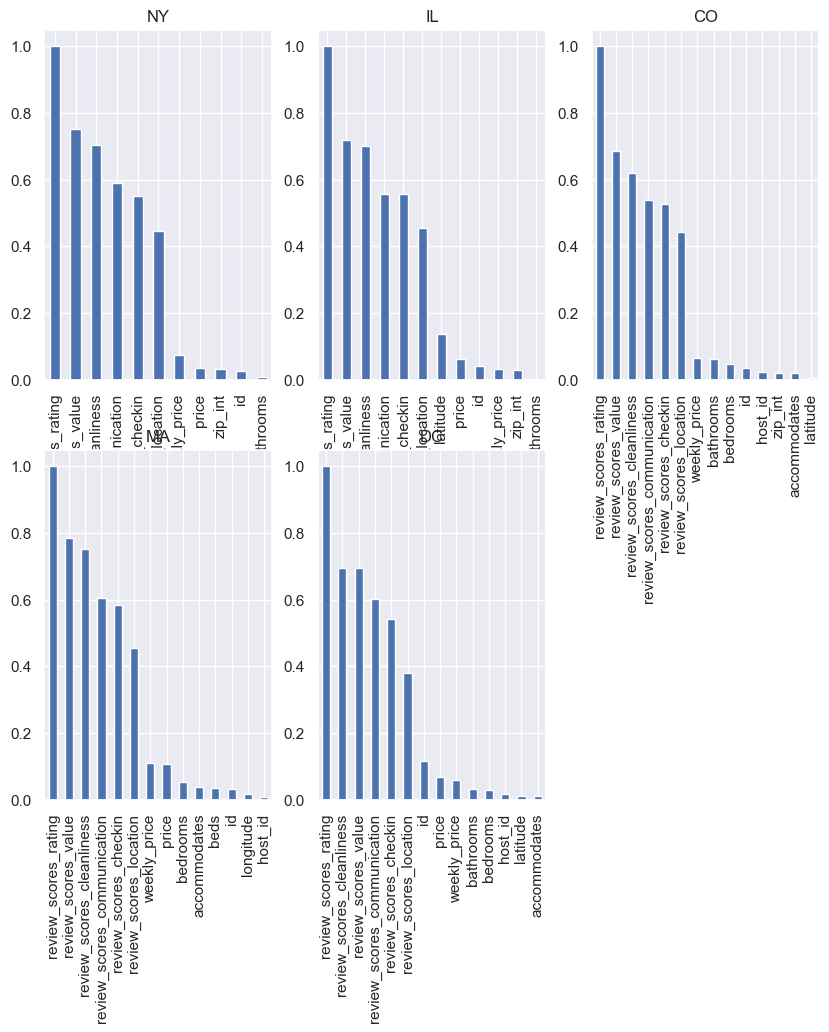

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
NY_sorted.plot(kind='bar')
plt.title('NY')
plt.subplot(2,3,2)
IL_sorted.plot(kind='bar')
plt.title('IL')
plt.subplot(2,3,3)
CO_sorted.plot(kind='bar')
plt.title('CO')
plt.subplot(2,3,4)
MA_sorted.plot(kind='bar')
plt.title('MA')
plt.subplot(2,3,5)
DC_sorted.plot(kind='bar')
plt.title('DC')


### Boxplot of the entire dataset

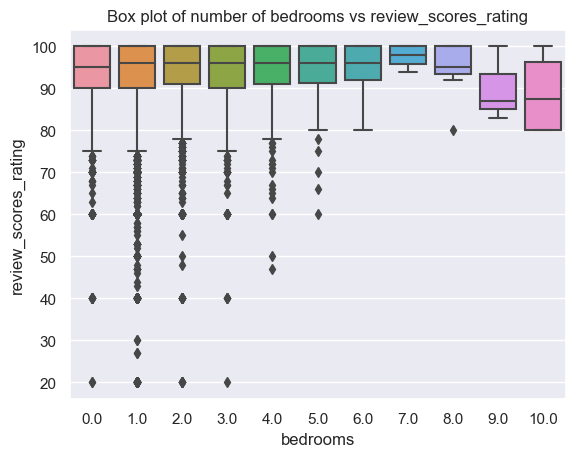

In [66]:
ax = sns.boxplot(x='bedrooms', y = 'review_scores_rating' , data = df).set(title = 'Box plot of number of bedrooms vs review_scores_rating')


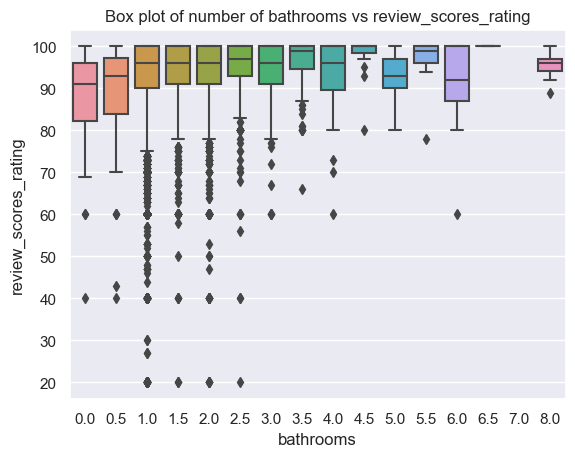

In [67]:
ax = sns.boxplot(x = 'bathrooms' , y = 'review_scores_rating' , data = df).set(title = 'Box plot of number of bathrooms vs review_scores_rating')

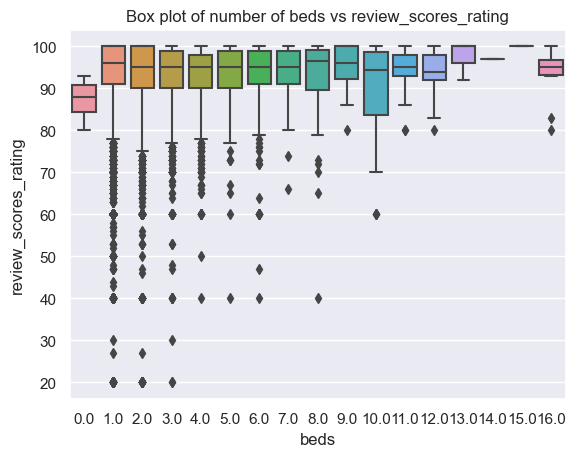

In [68]:
ax = sns.boxplot(x = 'beds' , y= 'review_scores_rating', data = df).set(title = 'Box plot of number of beds vs review_scores_rating')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'House'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Loft'),
  Text(3, 0, 'Dorm'),
  Text(4, 0, 'Condominium'),
  Text(5, 0, 'Bed & Breakfast'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Townhouse'),
  Text(8, 0, 'Guesthouse'),
  Text(9, 0, 'Boat'),
  Text(10, 0, 'Hostel'),
  Text(11, 0, 'Bungalow'),
  Text(12, 0, 'Timeshare'),
  Text(13, 0, 'Boutique hotel'),
  Text(14, 0, 'Guest suite'),
  Text(15, 0, 'Tent'),
  Text(16, 0, 'In-law'),
  Text(17, 0, 'Serviced apartment'),
  Text(18, 0, 'Villa'),
  Text(19, 0, 'Cabin'),
  Text(20, 0, 'Earth House'),
  Text(21, 0, 'Cave'),
  Text(22, 0, 'Castle'),
  Text(23, 0, 'Lighthouse'),
  Text(24, 0, 'Hut'),
  Text(25, 0, 'Vacation home'),
  Text(26, 0, 'Chalet'),
  Text(27, 0, 'Camper/RV'),
  Text(28, 0, 'Treehouse'),
  Text(29, 0, 'Island'),
  Text(30, 0, 'Entire Floor'),
  Text(31, 0, 'Train')])

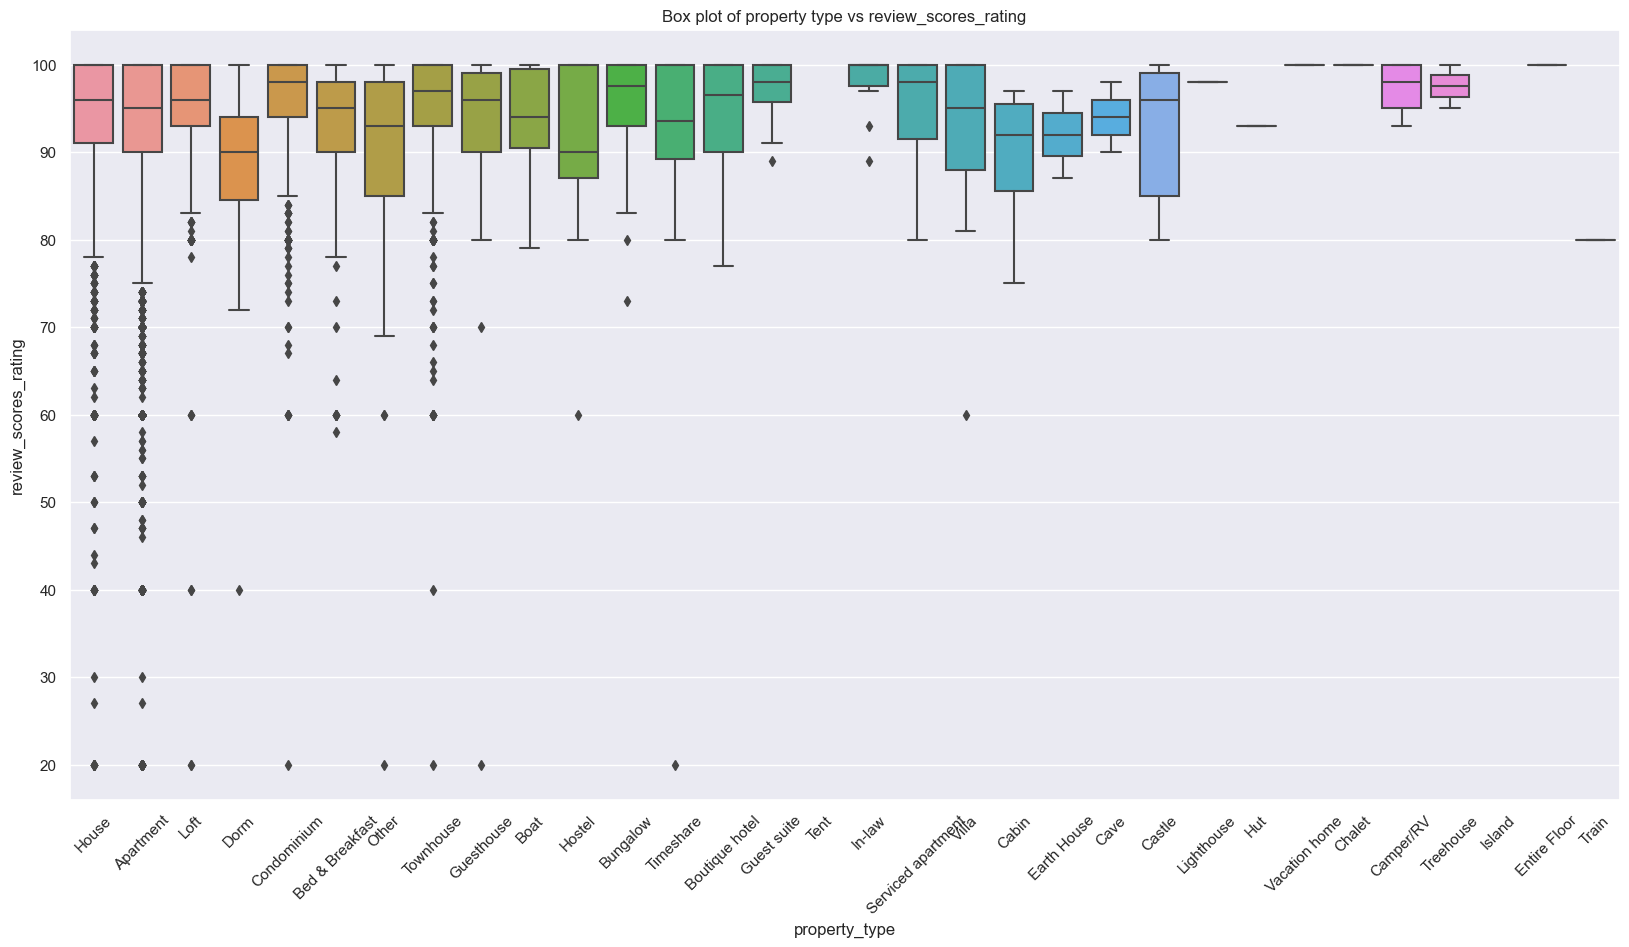

In [69]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'property_type' , y = 'review_scores_rating' , data = df).set(title = 'Box plot of property type vs review_scores_rating')
plt.xticks(rotation = 45)

### Plots of New York

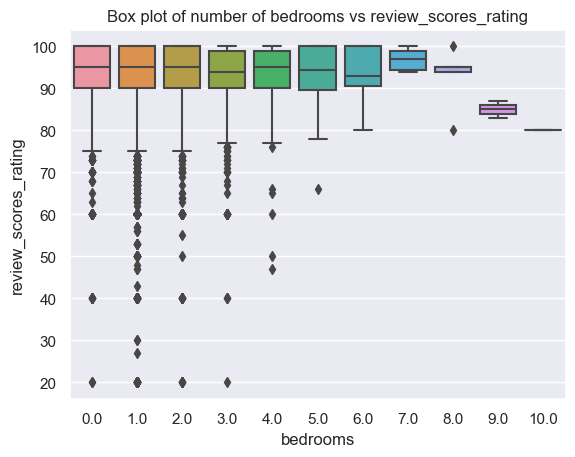

In [70]:
ax = sns.boxplot(x='bedrooms', y = 'review_scores_rating' , data = NY).set(title = 'Box plot of number of bedrooms vs review_scores_rating')


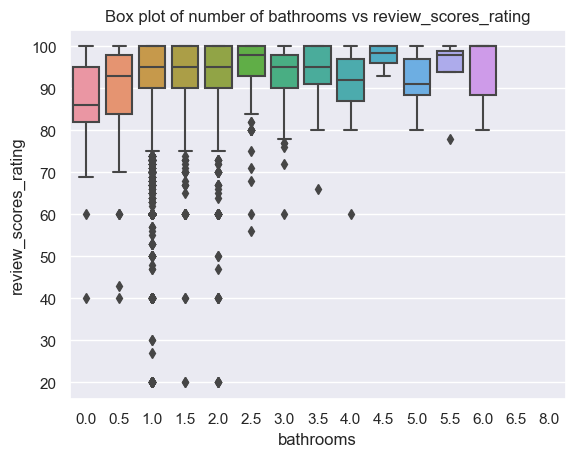

In [71]:
ax = sns.boxplot(x = 'bathrooms' , y = 'review_scores_rating' , data = NY).set(title = 'Box plot of number of bathrooms vs review_scores_rating')

<b>Proportion of NY listings that have 0 and 0.5 bathrooms</b>

In [72]:
(len(NY[NY['bathrooms'] == 0])+len(NY[NY['bathrooms'] == 0.5]))/len(NY.bathrooms)

0.0047350844838757915

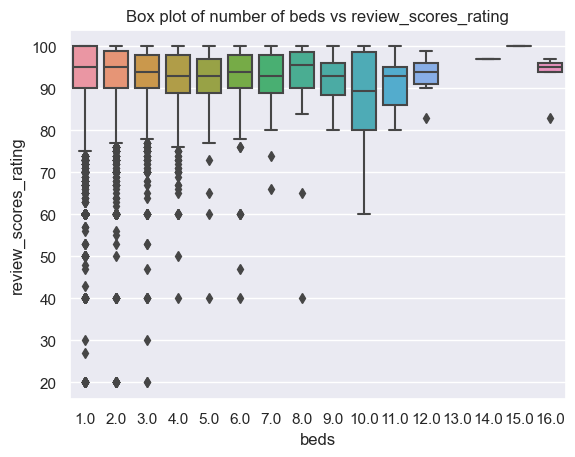

In [73]:
ax = sns.boxplot(x = 'beds' , y= 'review_scores_rating', data = NY).set(title = 'Box plot of number of beds vs review_scores_rating')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'House'),
  Text(1, 0, 'Apartment'),
  Text(2, 0, 'Loft'),
  Text(3, 0, 'Dorm'),
  Text(4, 0, 'Condominium'),
  Text(5, 0, 'Bed & Breakfast'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Townhouse'),
  Text(8, 0, 'Guesthouse'),
  Text(9, 0, 'Boat'),
  Text(10, 0, 'Hostel'),
  Text(11, 0, 'Bungalow'),
  Text(12, 0, 'Timeshare'),
  Text(13, 0, 'Boutique hotel'),
  Text(14, 0, 'Guest suite'),
  Text(15, 0, 'Tent'),
  Text(16, 0, 'In-law'),
  Text(17, 0, 'Serviced apartment'),
  Text(18, 0, 'Villa'),
  Text(19, 0, 'Cabin'),
  Text(20, 0, 'Earth House'),
  Text(21, 0, 'Cave'),
  Text(22, 0, 'Castle'),
  Text(23, 0, 'Lighthouse'),
  Text(24, 0, 'Hut'),
  Text(25, 0, 'Vacation home'),
  Text(26, 0, 'Chalet')])

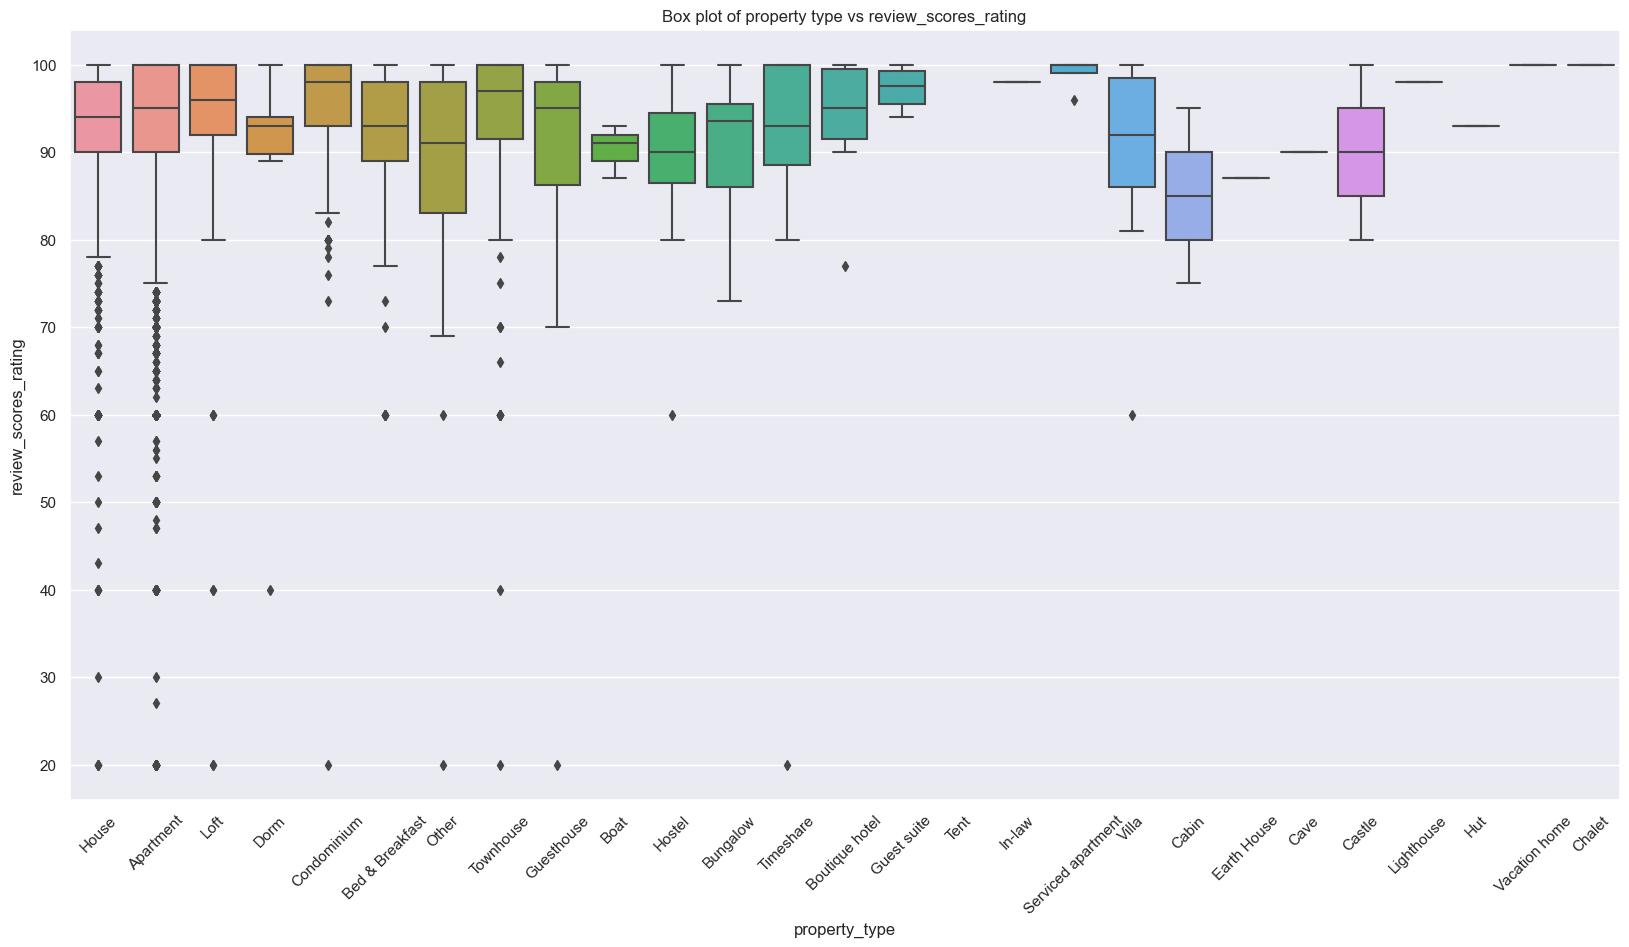

In [74]:
plt.figure(figsize = (20,10))
ax = sns.boxplot(x = 'property_type' , y = 'review_scores_rating' , data =NY).set(title = 'Box plot of property type vs review_scores_rating')
plt.xticks(rotation = 45)

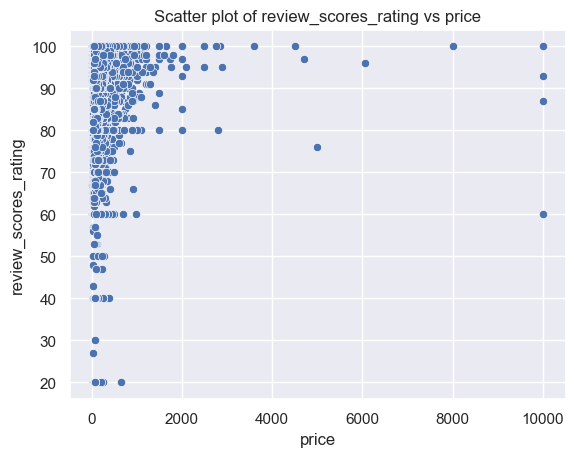

In [75]:
ax = sns.scatterplot(x = 'price',y = 'review_scores_rating', data = NY ).set(title = 'Scatter plot of review_scores_rating vs price')

[Text(0.5, 1.0, 'histogram of review_scores_rating')]

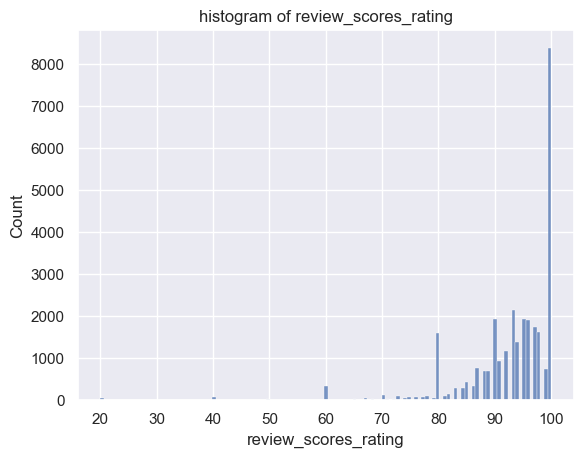

In [76]:
sns.histplot(x='review_scores_rating', data=NY).set(title = 'histogram of review_scores_rating')

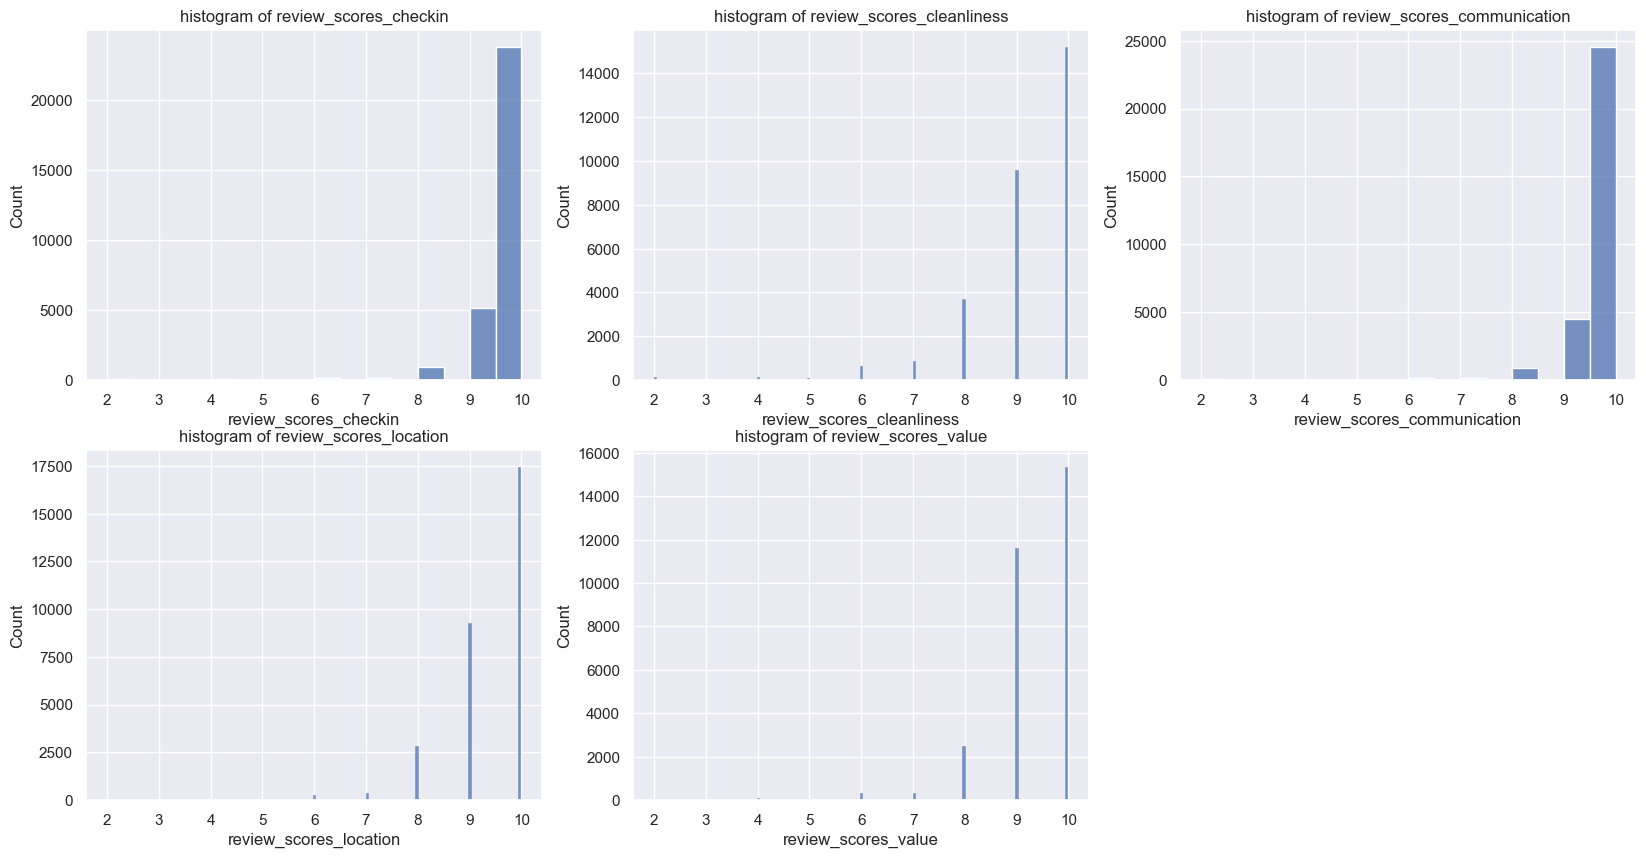

In [77]:
subreview = ['review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value']
plt.figure(figsize= (20,10))
for i,review in enumerate(subreview):
    plt.subplot(2,3,i+1)
    sns.histplot(x=review,data = NY).set(title = 'histogram of '+review)

In [78]:
NY['amenities_num'] = NY['amenities'].str.count('\w+')
NY

/var/folders/7y/bqhzt9sn3zn65pztbxqsqbzm0000gn/T/ipykernel_35098/2728902187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY['amenities_num'] = NY['amenities'].str.count('\w+')


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,zipcode_modified,zip_int,amenities_num
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,100.0,10.0,Private room,NY,NaN,10464,10464,10464,42
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,Private room,NY,NaN,10464,10464,10464,27
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464,10464,10464,16
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464,10464,10464,31
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,97.0,10.0,Private room,NY,350.0,10464,10464,10464,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40736,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,3.0,Real Bed,4.0,4.0,strict,new york,NaN,...,10.0,100.0,10.0,Entire home/apt,NY,6200.0,10024,10024,10024,36
40737,6.0,"{TV,""Air conditioning"",Kitchen,""Smoking allowe...",0,2.0,Real Bed,2.0,3.0,flexible,new york,NaN,...,NaN,NaN,NaN,Entire home/apt,NY,NaN,10004,10004,10004,27
40738,4.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",29,1.0,Real Bed,2.0,3.0,strict,new york,NaN,...,NaN,NaN,NaN,Private room,NY,NaN,10029,10029,10029,37
40739,6.0,"{TV,""Air conditioning"",""Smoking allowed"",""Pets...",0,2.0,Real Bed,2.0,3.0,moderate,long island city,NaN,...,NaN,NaN,NaN,Private room,NY,NaN,10001,10001,10001,32


Text(0.5, 1.0, 'Number of amenities')

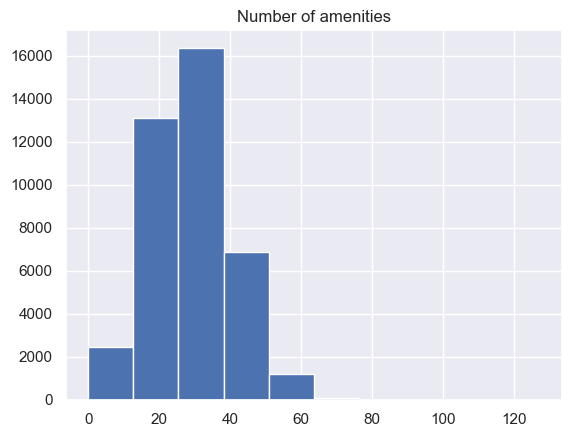

In [79]:
plt.hist(NY.amenities_num)
plt.title('Number of amenities')

In [80]:
NY.amenities_num.describe()

count    40126.000000
mean        29.151747
std         11.294090
min          0.000000
25%         21.000000
50%         29.000000
75%         37.000000
max        127.000000
Name: amenities_num, dtype: float64

## Heatmap of New York based on real esate value

In [81]:
df_estate_NY = df_estate.loc[df_estate['state'].str.contains('NY')]

In [82]:
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=20)

In [83]:
map.choropleth(geo_data="https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson",
             data = df_estate,
             columns= ['zipcode', 'value'], 
             key_on='feature.properties.postalCode',
             fill_color='YlOrRd', 
             fill_opacity=0.7, 
             line_opacity=0.2,
             legend_name='value')

/Users/jeongmookwag/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [84]:
map

# Building a logistic regression model

## Data cleaning


In [85]:
#mean_real_estate is the mean value of overall property value
merged_df['mean_real_estate'] = merged_df.iloc[:,38:293].mean(axis=1)    
merged_df1 = merged_df.drop(list(merged_df)[38:293],axis=1)
NY_reale = merged_df1.loc[merged_df1['state_x'].str.contains('NY')]
NY_reale['reale_group'] = pd.qcut(NY_reale['mean_real_estate'],3,labels = ['low','mid','high'])
NY_reale = NY_reale.drop(columns=['metro','zipcode_y','zip_int','has_availability','county','state_x','state_y','size_rank','city_y','city_x','type'])
NY_reale_high = NY_reale.loc[NY_reale['reale_group'].str.contains('high')]
NY_reale_mid = NY_reale.loc[NY_reale['reale_group'].str.contains('mid')]
NY_reale_low = NY_reale.loc[NY_reale['reale_group'].str.contains('low')]
# Tried to convert mean_real_estate to categorical variable by quantiles.
#However we decided to convert it using K-cluster mean


/var/folders/7y/bqhzt9sn3zn65pztbxqsqbzm0000gn/T/ipykernel_35098/3388665602.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_reale['reale_group'] = pd.qcut(NY_reale['mean_real_estate'],3,labels = ['low','mid','high'])


## K-cluster mean

In [86]:
x = NY_reale.iloc[:, [27]].values 
x

array([[478419.76047904],
       [  1763.23880597],
       [478419.76047904],
       ...,
       [  2582.74626866],
       [363105.88235294],
       [  2501.44776119]])

In [87]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 1337)  
y_predict= kmeans.fit_predict(x)
#Converting to categorical variable using K-mean
y_predict = pd.DataFrame(y_predict)
y_pred = y_predict.rename(columns={0:'category'} )
y_p = pd.concat([NY_reale,y_pred],axis=1)
y_p_mid = y_p.loc[y_p['category']==0.0]
print('mid',y_p_mid['mean_real_estate'].mean())
y_p_low = y_p.loc[y_p['category']==1.0]
print('low',y_p_low['mean_real_estate'].mean())
y_p_high = y_p.loc[y_p['category']==2.0]
print('high',y_p_high['mean_real_estate'].mean())
y_p['category'].unique()


mid 644218.096475549
low 10881.412396233442
high 1909449.1067145045


array([ 0.,  1.,  2., nan])

In [88]:
y_p = y_p.assign(ordered_property_val = pd.cut(y_p['category'],bins = [-1,0,1,2],labels = [1,0,2]))  

In [89]:
y_p

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,host_id,id,...,review_scores_rating,review_scores_value,room_type,weekly_price,zipcode_x,zipcode_modified,mean_real_estate,reale_group,category,ordered_property_val
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24.0,1.0,Real Bed,1.0,1.0,moderate,119445.0,7949480.0,...,100.0,10.0,Private room,NaN,10464,10464,478419.760479,high,0.0,1
1,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24.0,1.0,Real Bed,1.0,1.0,moderate,119445.0,7949480.0,...,100.0,10.0,Private room,NaN,10464,10464,1763.238806,low,1.0,0
2,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30.0,1.0,Real Bed,1.0,1.0,flexible,9117975.0,16042478.0,...,NaN,NaN,Private room,NaN,10464,10464,478419.760479,high,0.0,1
3,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30.0,1.0,Real Bed,1.0,1.0,flexible,9117975.0,16042478.0,...,NaN,NaN,Private room,NaN,10464,10464,1763.238806,low,1.0,0
4,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30.0,3.0,Real Bed,3.0,3.0,strict,9815788.0,1886820.0,...,NaN,NaN,Entire home/apt,NaN,10464,10464,478419.760479,high,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60059,2.0,{},25.0,1.0,Real Bed,1.0,1.0,flexible,125021432.0,18197581.0,...,NaN,NaN,Private room,NaN,10705,10705,2501.447761,low,NaN,NaN
11714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1
11715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
59775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1


In [90]:
NY_reale['property_val_cat'] =   y_p['ordered_property_val']
NY_reale.dropna(subset = 'property_val_cat',inplace=True)
NY_reale['property_val_cat'] = NY_reale['property_val_cat'].astype(int)

In [91]:
print('number of data for high:',len(y_p_high))
print('number of data for mid:',len(y_p_mid))
print('number of data for low:', len(y_p_low))

number of data for high: 1241
number of data for mid: 19963
number of data for low: 38852


In [92]:
NY_reale.isnull().mean()

accommodates                   0.000000
amenities                      0.000000
availability_30                0.000000
bathrooms                      0.003847
bed_type                       0.000000
bedrooms                       0.001599
beds                           0.001282
cancellation_policy            0.000000
host_id                        0.000000
id                             0.000000
instant_bookable               0.000000
latitude                       0.000000
longitude                      0.000000
metropolitan                   0.000000
name                           0.000799
price                          0.000000
property_type                  0.000000
review_scores_checkin          0.245937
review_scores_cleanliness      0.244588
review_scores_communication    0.244588
review_scores_location         0.245920
review_scores_rating           0.243039
review_scores_value            0.245970
room_type                      0.000000
weekly_price                   0.773113


Filling null values with the median for reviews

In [93]:
NY_reale['review_scores_rating'] = NY_reale['review_scores_rating'].fillna(NY_reale['review_scores_rating'].median())
NY_reale['review_scores_cleanliness'] = NY_reale['review_scores_cleanliness'].fillna(NY_reale['review_scores_cleanliness'].median())
NY_reale['review_scores_communication'] = NY_reale['review_scores_communication'].fillna(NY_reale['review_scores_communication'].median())
NY_reale['review_scores_checkin'] = NY_reale['review_scores_checkin'].fillna(NY_reale['review_scores_checkin'].median())
NY_reale['review_scores_location'] = NY_reale['review_scores_location'].fillna(NY_reale['review_scores_location'].median())
NY_reale['review_scores_value'] = NY_reale['review_scores_value'].fillna(NY_reale['review_scores_value'].median())

In [94]:
#Converting review_scores_rating columns to binary. 
good_review = list()
for review in NY_reale.review_scores_rating:
    if review >=95:
        good_review.append(1)
    else:
        good_review.append(0)
NY_reale['review_scores_rating'] = good_review
NY_reale

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,host_id,id,...,review_scores_location,review_scores_rating,review_scores_value,room_type,weekly_price,zipcode_x,zipcode_modified,mean_real_estate,reale_group,property_val_cat
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,119445,7949480,...,10.0,1,10.0,Private room,NaN,10464,10464,478419.760479,high,1
1,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,119445,7949480,...,10.0,1,10.0,Private room,NaN,10464,10464,1763.238806,low,0
2,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,9117975,16042478,...,10.0,1,10.0,Private room,NaN,10464,10464,478419.760479,high,1
3,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,9117975,16042478,...,10.0,1,10.0,Private room,NaN,10464,10464,1763.238806,low,0
4,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,9815788,1886820,...,10.0,1,10.0,Entire home/apt,NaN,10464,10464,478419.760479,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60051,1.0,"{""Cable TV"",Internet,""Wireless Internet"",Kitch...",0,2.0,Real Bed,1.0,1.0,flexible,34295758,9548935,...,10.0,1,10.0,Private room,NaN,10704,10704,2429.074627,low,0
60052,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,123778595,18006860,...,10.0,1,10.0,Entire home/apt,NaN,11003,11003,300996.862745,mid,1
60053,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,123778595,18006860,...,10.0,1,10.0,Entire home/apt,NaN,11003,11003,2469.567164,low,0
60054,2.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",29,1.0,Real Bed,1.0,1.0,moderate,7657489,18357889,...,10.0,1,10.0,Entire home/apt,NaN,11580,11580,317352.941176,mid,1


[Text(0.5, 1.0, 'histogram of review_scores_rating after getting converting into a categorial variable')]

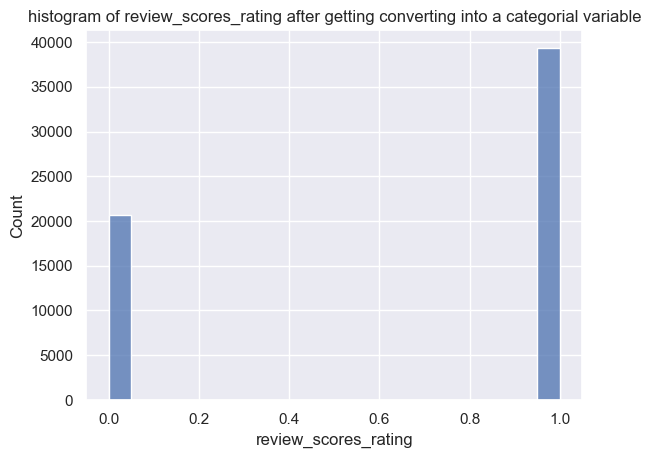

In [95]:
sns.histplot(data = NY_reale, x = 'review_scores_rating').set(title = 'histogram of review_scores_rating after getting converting into a categorial variable')

<b> Plotting stripplot of price and property value(0 =low 1 = mid =2 = high) on review scores rating </b>

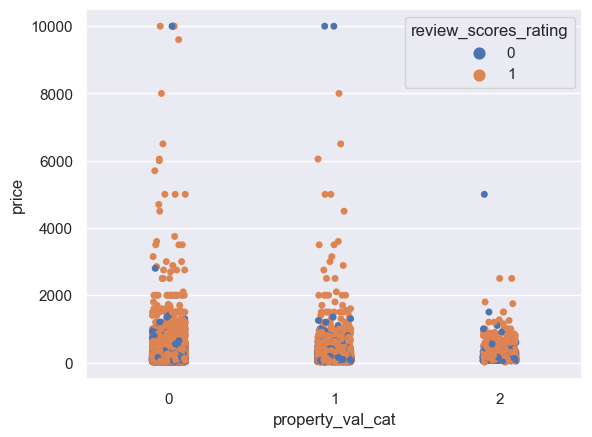

In [96]:
ax = sns.stripplot(x='property_val_cat',y = 'price',hue = 'review_scores_rating',data = NY_reale)

In [97]:
#below processes are to convert amenities columns to one hot encoding.
amenities = np.array(NY_reale['amenities'].map(lambda amns: amns.replace('"',"").replace('{',"").replace('}',"").split(',')))
all_amenities = np.unique(np.concatenate(amenities))[1:]

In [98]:
NY_reale.amenities = NY_reale.amenities.str.replace("[{}]", "").str.replace('"', "")
NY_reale

/var/folders/7y/bqhzt9sn3zn65pztbxqsqbzm0000gn/T/ipykernel_35098/3923291783.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  NY_reale.amenities = NY_reale.amenities.str.replace("[{}]", "").str.replace('"', "")


,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,host_id,id,...,review_scores_location,review_scores_rating,review_scores_value,room_type,weekly_price,zipcode_x,zipcode_modified,mean_real_estate,reale_group,property_val_cat
0,2.0,"Cable TV,Wireless Internet,Air conditioning,Fr...",24,1.0,Real Bed,1.0,1.0,moderate,119445,7949480,...,10.0,1,10.0,Private room,NaN,10464,10464,478419.760479,high,1
1,2.0,"Cable TV,Wireless Internet,Air conditioning,Fr...",24,1.0,Real Bed,1.0,1.0,moderate,119445,7949480,...,10.0,1,10.0,Private room,NaN,10464,10464,1763.238806,low,0
2,4.0,"TV,Internet,Wireless Internet,Air conditioning...",30,1.0,Real Bed,1.0,1.0,flexible,9117975,16042478,...,10.0,1,10.0,Private room,NaN,10464,10464,478419.760479,high,1
3,4.0,"TV,Internet,Wireless Internet,Air conditioning...",30,1.0,Real Bed,1.0,1.0,flexible,9117975,16042478,...,10.0,1,10.0,Private room,NaN,10464,10464,1763.238806,low,0
4,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",30,3.0,Real Bed,3.0,3.0,strict,9815788,1886820,...,10.0,1,10.0,Entire home/apt,NaN,10464,10464,478419.760479,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60051,1.0,"Cable TV,Internet,Wireless Internet,Kitchen,Pe...",0,2.0,Real Bed,1.0,1.0,flexible,34295758,9548935,...,10.0,1,10.0,Private room,NaN,10704,10704,2429.074627,low,0
60052,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",17,1.0,Real Bed,1.0,2.0,strict,123778595,18006860,...,10.0,1,10.0,Entire home/apt,NaN,11003,11003,300996.862745,mid,1
60053,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",17,1.0,Real Bed,1.0,2.0,strict,123778595,18006860,...,10.0,1,10.0,Entire home/apt,NaN,11003,11003,2469.567164,low,0
60054,2.0,"TV,Internet,Wireless Internet,Air conditioning...",29,1.0,Real Bed,1.0,1.0,moderate,7657489,18357889,...,10.0,1,10.0,Entire home/apt,NaN,11580,11580,317352.941176,mid,1


In [99]:
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(NY_reale['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities

/Users/jeongmookwag/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,24-hour check-in,accessible-height bed,air conditioning,baby bath,baby monitor,babysitter recommendations,bathtub,bbq grill,beach essentials,...,tv,washer,washer / dryer,wheelchair accessible,wide clearance to bed,wide clearance to shower and toilet,wide doorway,wide hallway clearance,window guards,wireless internet
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60048,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
60049,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
60050,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [100]:
NY_reale = NY_reale.drop(columns = ['name','metropolitan','id','host_id','zipcode_x','latitude','longitude'])
NY_reale

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,instant_bookable,price,...,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,weekly_price,zipcode_modified,mean_real_estate,reale_group,property_val_cat
0,2.0,"Cable TV,Wireless Internet,Air conditioning,Fr...",24,1.0,Real Bed,1.0,1.0,moderate,f,99.0,...,10.0,10.0,1,10.0,Private room,NaN,10464,478419.760479,high,1
1,2.0,"Cable TV,Wireless Internet,Air conditioning,Fr...",24,1.0,Real Bed,1.0,1.0,moderate,f,99.0,...,10.0,10.0,1,10.0,Private room,NaN,10464,1763.238806,low,0
2,4.0,"TV,Internet,Wireless Internet,Air conditioning...",30,1.0,Real Bed,1.0,1.0,flexible,t,200.0,...,10.0,10.0,1,10.0,Private room,NaN,10464,478419.760479,high,1
3,4.0,"TV,Internet,Wireless Internet,Air conditioning...",30,1.0,Real Bed,1.0,1.0,flexible,t,200.0,...,10.0,10.0,1,10.0,Private room,NaN,10464,1763.238806,low,0
4,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",30,3.0,Real Bed,3.0,3.0,strict,f,300.0,...,10.0,10.0,1,10.0,Entire home/apt,NaN,10464,478419.760479,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60051,1.0,"Cable TV,Internet,Wireless Internet,Kitchen,Pe...",0,2.0,Real Bed,1.0,1.0,flexible,f,200.0,...,10.0,10.0,1,10.0,Private room,NaN,10704,2429.074627,low,0
60052,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",17,1.0,Real Bed,1.0,2.0,strict,f,85.0,...,10.0,10.0,1,10.0,Entire home/apt,NaN,11003,300996.862745,mid,1
60053,4.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",17,1.0,Real Bed,1.0,2.0,strict,f,85.0,...,10.0,10.0,1,10.0,Entire home/apt,NaN,11003,2469.567164,low,0
60054,2.0,"TV,Internet,Wireless Internet,Air conditioning...",29,1.0,Real Bed,1.0,1.0,moderate,f,122.0,...,10.0,10.0,1,10.0,Entire home/apt,NaN,11580,317352.941176,mid,1


In [101]:
NY_reale = NY_reale.drop(columns=['weekly_price','price','accommodates','availability_30','beds','bedrooms','zipcode_modified','amenities','reale_group','property_type','cancellation_policy','room_type','bed_type','instant_bookable'])


In [102]:
df_amenities = df_amenities.drop(columns = ['translation missing: en.hosting_amenity_49','translation missing: en.hosting_amenity_50'],inplace=False)


In [103]:
df_amenities

,,24-hour check-in,accessible-height bed,air conditioning,baby bath,baby monitor,babysitter recommendations,bathtub,bbq grill,beach essentials,...,tv,washer,washer / dryer,wheelchair accessible,wide clearance to bed,wide clearance to shower and toilet,wide doorway,wide hallway clearance,window guards,wireless internet
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60048,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
60049,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
60050,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [104]:
df_amenities.rename(columns={'24-hour check-in':'twentyfour_hour_check_in','self check-in':'self_check_in','accessible height bed':'accessible_height_bed'},inplace = True)

In [105]:
#re-naming the columns
for i in df_amenities.columns:
    if ' ' in i:
        df_amenities.rename(columns = {i:i.replace(' ','_')},inplace = True)
for i in df_amenities.columns:
    if '/' in i:
         df_amenities.rename(columns = {i:i.replace('/','_')},inplace = True)

In [106]:
amenities_list = list()
for i in df_amenities.columns:
    if(i != ''):
        amenities_list.append(i)

In [107]:
#Making a list of the least frequent amenities
infrequent_amenities = list()
for amenity in amenities_list:
    if df_amenities[df_amenities[amenity] == 1].count()[0] < 50:
        infrequent_amenities.append(amenity)
infrequent_amenities

['accessible-height_bed',
 'bbq_grill',
 'beach_essentials',
 'bed_linens',
 'cleaning_before_checkout',
 'coffee_maker',
 'cooking_basics',
 'dishes_and_silverware',
 'dishwasher',
 'ethernet_connection',
 'extra_pillows_and_blankets',
 'fireplace_guards',
 'firm_matress',
 'flat_smooth_pathway_to_front_door',
 'free_parking_on_street',
 'garden_or_backyard',
 'hot_water',
 'long_term_stays_allowed',
 'luggage_dropoff_allowed',
 'microwave',
 'oven',
 'path_to_entrance_lit_at_night',
 'patio_or_balcony',
 'private_bathroom',
 'refrigerator',
 'step-free_access',
 'stove',
 'table_corner_guards',
 'washer___dryer',
 'wide_clearance_to_bed',
 'wide_clearance_to_shower_and_toilet',
 'wide_doorway',
 'wide_hallway_clearance']

In [108]:
#making a list of the most frequent amenities
freq_amenities = list()
for amenity in amenities_list:
    if df_amenities[df_amenities[amenity] == 1].count()[0] >= 2000:
        freq_amenities.append(amenity)

In [109]:
freq_amenities

['twentyfour_hour_check_in',
 'air_conditioning',
 'breakfast',
 'buzzer_wireless_intercom',
 'cable_tv',
 'carbon_monoxide_detector',
 'cat(s)',
 'dog(s)',
 'doorman',
 'dryer',
 'elevator_in_building',
 'essentials',
 'family_kid_friendly',
 'fire_extinguisher',
 'first_aid_kit',
 'free_parking_on_premises',
 'gym',
 'hair_dryer',
 'hangers',
 'heating',
 'hot_tub',
 'indoor_fireplace',
 'internet',
 'iron',
 'kitchen',
 'laptop_friendly_workspace',
 'lock_on_bedroom_door',
 'lockbox',
 'pets_allowed',
 'pets_live_on_this_property',
 'private_entrance',
 'safety_card',
 'self_check_in',
 'shampoo',
 'smoke_detector',
 'smoking_allowed',
 'suitable_for_events',
 'tv',
 'washer',
 'wheelchair_accessible',
 'wireless_internet']

In [110]:
len(freq_amenities)

41

In [111]:
df_amenities = df_amenities[df_amenities.columns.intersection(freq_amenities)]

In [112]:
NY_reale = pd.concat([NY_reale, df_amenities], axis=1, join='inner')


In [113]:
NY_reale

,bathrooms,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,mean_real_estate,property_val_cat,twentyfour_hour_check_in,...,safety_card,self_check_in,shampoo,smoke_detector,smoking_allowed,suitable_for_events,tv,washer,wheelchair_accessible,wireless_internet
0,1.0,10.0,10.0,10.0,10.0,1,10.0,478419.760479,1,0,...,0,0,1,1,0,0,0,0,0,1
1,1.0,10.0,10.0,10.0,10.0,1,10.0,1763.238806,0,0,...,0,0,1,1,0,0,0,0,0,1
2,1.0,10.0,10.0,10.0,10.0,1,10.0,478419.760479,1,0,...,0,0,1,1,0,0,1,0,0,1
3,1.0,10.0,10.0,10.0,10.0,1,10.0,1763.238806,0,0,...,0,0,1,1,0,0,1,0,0,1
4,3.0,10.0,10.0,10.0,10.0,1,10.0,478419.760479,1,0,...,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60047,1.0,10.0,9.0,10.0,9.0,0,9.0,1690.895522,0,0,...,0,0,0,0,0,0,0,0,0,1
60048,1.0,10.0,10.0,10.0,10.0,1,10.0,389679.354839,0,0,...,0,0,1,1,0,0,1,0,0,1
60049,1.0,10.0,10.0,10.0,10.0,1,10.0,1690.895522,0,0,...,0,0,1,1,0,0,1,0,0,1
60050,2.0,10.0,10.0,10.0,10.0,1,10.0,339299.215686,0,0,...,0,0,1,1,0,0,1,0,0,1


In [114]:
NY_reale.dropna(inplace=True)

In [115]:
rating_corr = NY_reale.corr()['review_scores_rating']
pos_corr = rating_corr > 0
neg_corr = rating_corr < 0 
rating_corr[pos_corr].sort_values(ascending = False)

review_scores_rating           1.000000
review_scores_value            0.575797
review_scores_cleanliness      0.553090
review_scores_location         0.426918
review_scores_communication    0.379511
review_scores_checkin          0.377296
gym                            0.024253
laptop_friendly_workspace      0.017934
private_entrance               0.017659
washer                         0.017248
dryer                          0.016023
kitchen                        0.013181
elevator_in_building           0.012786
mean_real_estate               0.012560
breakfast                      0.012546
tv                             0.011042
hangers                        0.010134
shampoo                        0.010077
doorman                        0.009565
pets_allowed                   0.009288
property_val_cat               0.009187
hair_dryer                     0.008945
essentials                     0.008261
lock_on_bedroom_door           0.006831
iron                           0.004279


In [116]:
rating_corr[neg_corr].sort_values(ascending = True)

internet                     -0.020425
twentyfour_hour_check_in     -0.019242
heating                      -0.011453
free_parking_on_premises     -0.011328
family_kid_friendly          -0.009693
hot_tub                      -0.009068
carbon_monoxide_detector     -0.008612
fire_extinguisher            -0.008544
cat(s)                       -0.007694
cable_tv                     -0.007616
safety_card                  -0.007598
air_conditioning             -0.007534
first_aid_kit                -0.005478
smoking_allowed              -0.004897
pets_live_on_this_property   -0.003975
wireless_internet            -0.003525
buzzer_wireless_intercom     -0.002778
self_check_in                -0.001747
bathrooms                    -0.000548
dog(s)                       -0.000324
suitable_for_events          -0.000282
lockbox                      -0.000186
Name: review_scores_rating, dtype: float64

In [117]:
NY_reale.corr()['property_val_cat']

bathrooms                      0.010000
review_scores_checkin          0.006991
review_scores_cleanliness      0.004124
review_scores_communication    0.005113
review_scores_location         0.023107
review_scores_rating           0.009187
review_scores_value            0.006066
mean_real_estate               0.935094
property_val_cat               1.000000
twentyfour_hour_check_in       0.003079
air_conditioning               0.005193
breakfast                     -0.011542
buzzer_wireless_intercom      -0.001114
cable_tv                      -0.004337
carbon_monoxide_detector       0.000885
cat(s)                         0.001305
dog(s)                         0.002694
doorman                       -0.002143
dryer                          0.010511
elevator_in_building          -0.030633
essentials                    -0.000499
family_kid_friendly            0.002156
fire_extinguisher              0.015236
first_aid_kit                  0.001010
free_parking_on_premises       0.001342


## Feature selection and Hypothesis testing

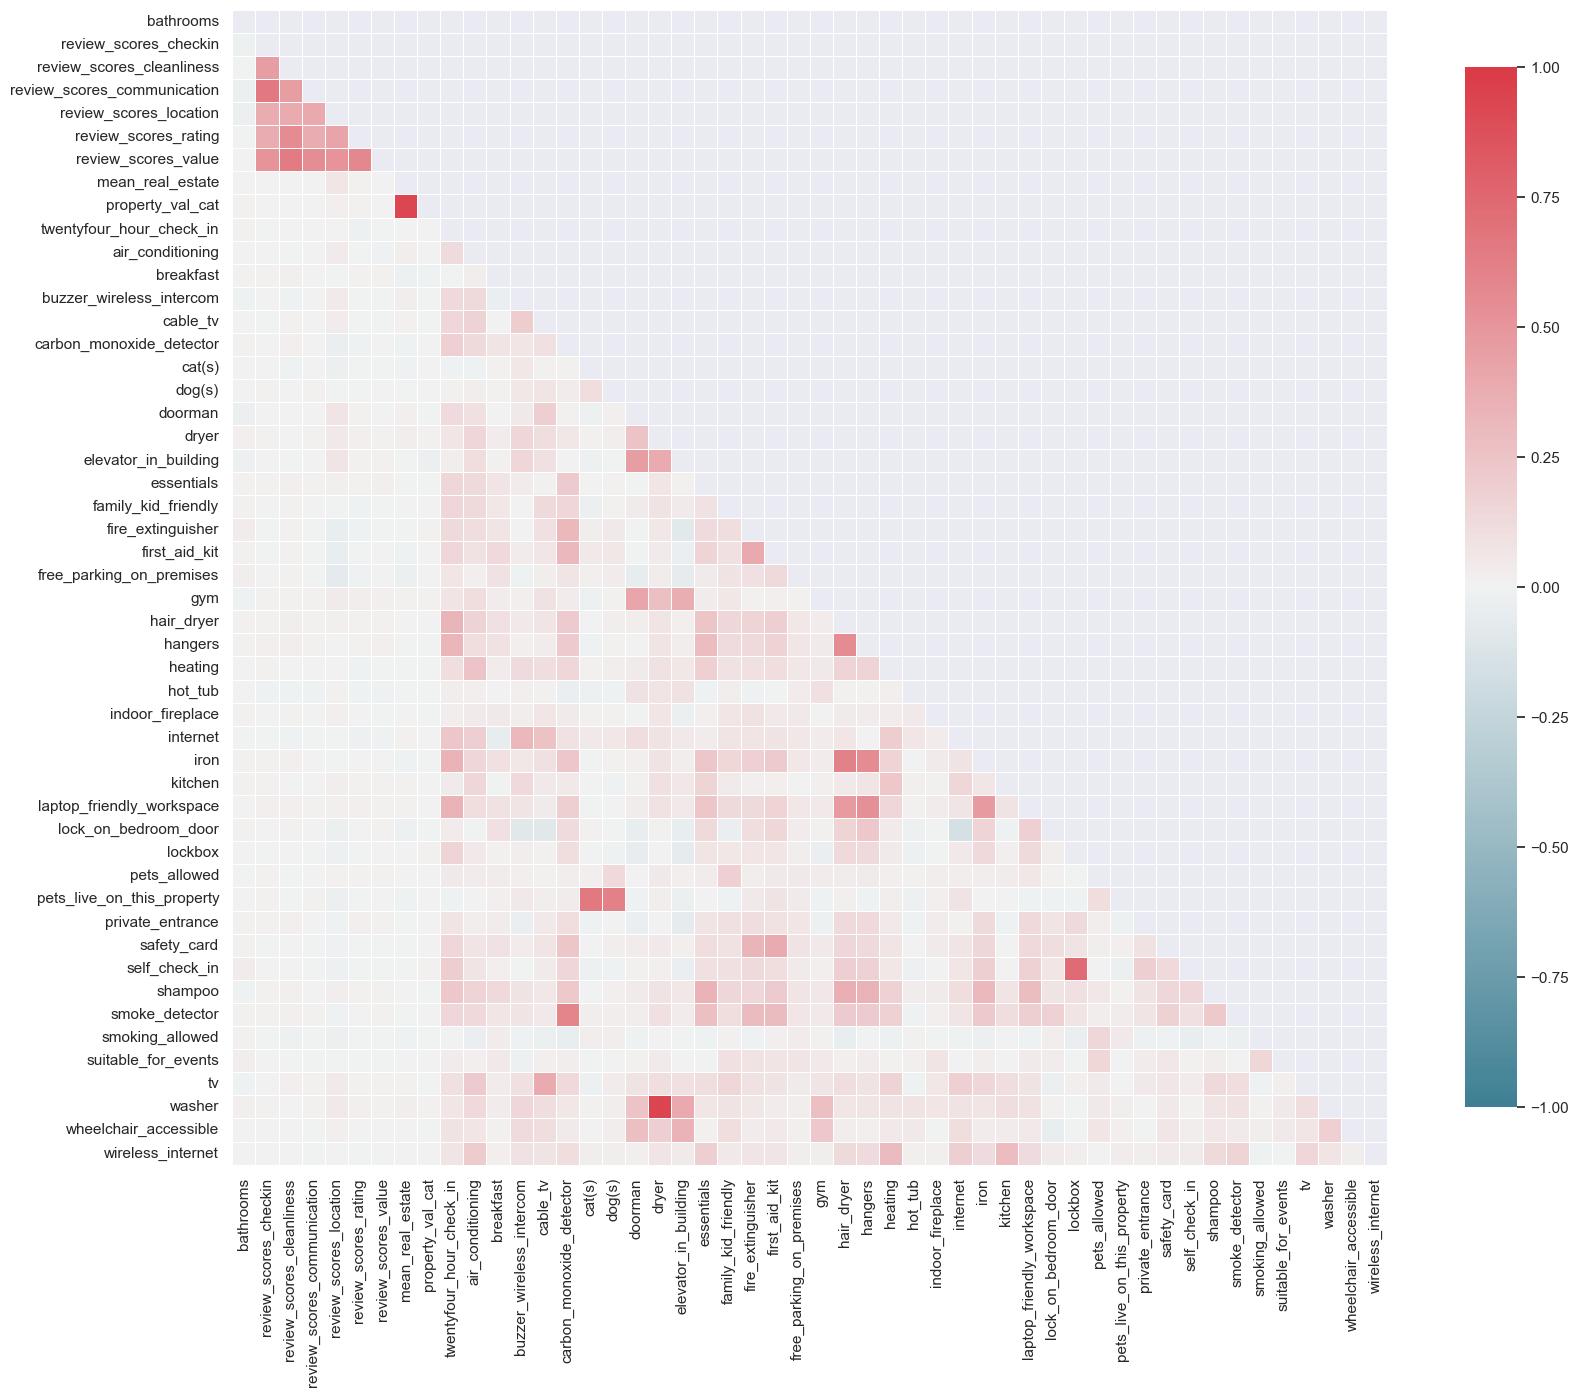

In [118]:
mask = np.zeros_like(NY_reale.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize= (20,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(NY_reale.corr(),mask=mask,  vmax=1, vmin=-1, cmap=cmap, 
            center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .9});

Drop lockbox,cats,dogs and dryer following from the heatmap above

In [119]:
#List of the most siginificant amenities.
order = rating_corr.abs().sort_values(ascending = False)
sig_amenities = list()
for amenity in order.index:
    sig_amenities.append(amenity)
remove = ['review_scores_rating','review_scores_cleanliness','review_scores_communication','review_scores_checkin','review_scores_location','review_scores_value','mean_real_estate','property_val_cat']
for i in remove:
    sig_amenities.remove(i)
sig_amenities.remove('lockbox')
sig_amenities.remove('cat(s)')
sig_amenities.remove('dog(s)')
sig_amenities.remove('dryer')

In [120]:
sig_amenities

['gym',
 'internet',
 'twentyfour_hour_check_in',
 'laptop_friendly_workspace',
 'private_entrance',
 'washer',
 'kitchen',
 'elevator_in_building',
 'breakfast',
 'heating',
 'free_parking_on_premises',
 'tv',
 'hangers',
 'shampoo',
 'family_kid_friendly',
 'doorman',
 'pets_allowed',
 'hot_tub',
 'hair_dryer',
 'carbon_monoxide_detector',
 'fire_extinguisher',
 'essentials',
 'cable_tv',
 'safety_card',
 'air_conditioning',
 'lock_on_bedroom_door',
 'first_aid_kit',
 'smoking_allowed',
 'iron',
 'indoor_fireplace',
 'wheelchair_accessible',
 'pets_live_on_this_property',
 'smoke_detector',
 'wireless_internet',
 'buzzer_wireless_intercom',
 'self_check_in',
 'bathrooms',
 'suitable_for_events']

twentyfour_hour_check_in


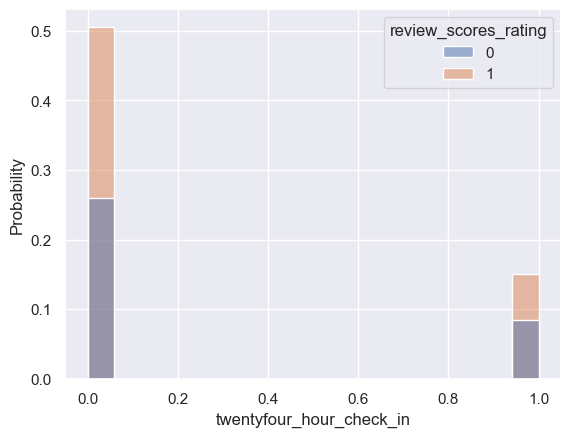

air_conditioning


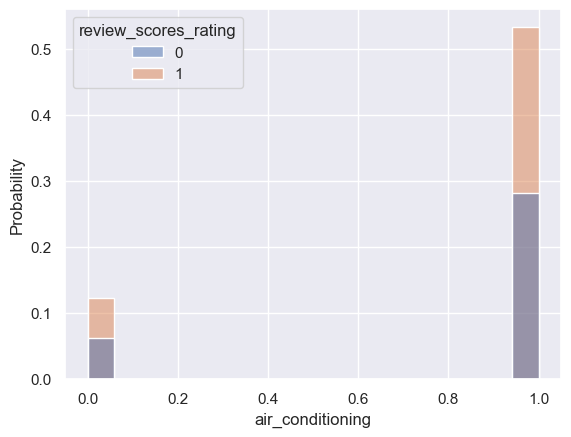

breakfast


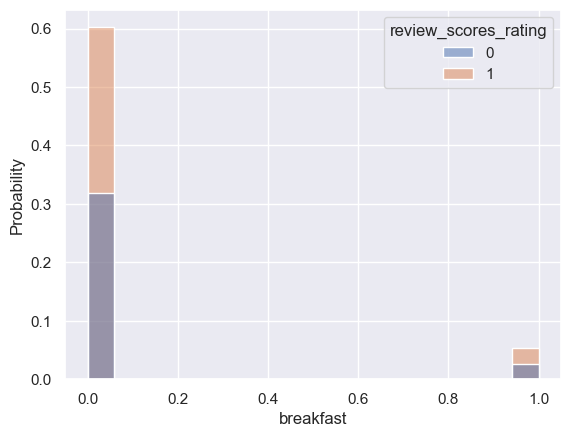

buzzer_wireless_intercom


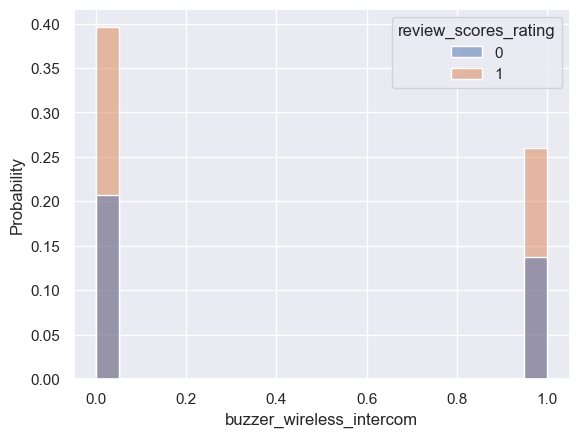

cable_tv


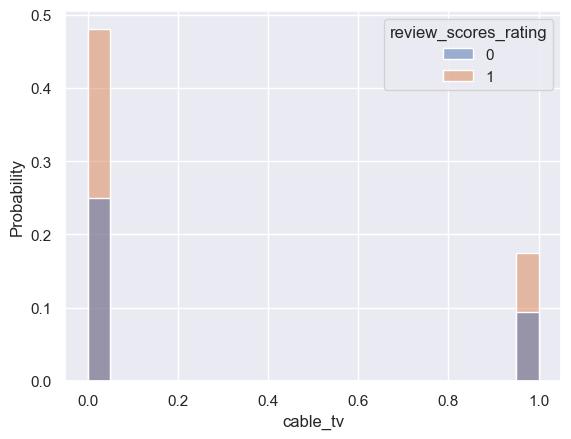

carbon_monoxide_detector


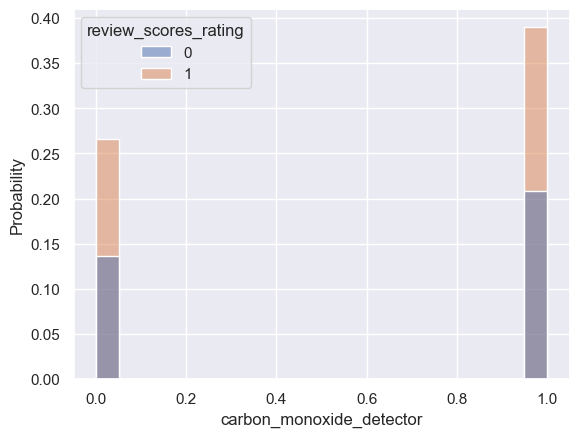

cat(s)


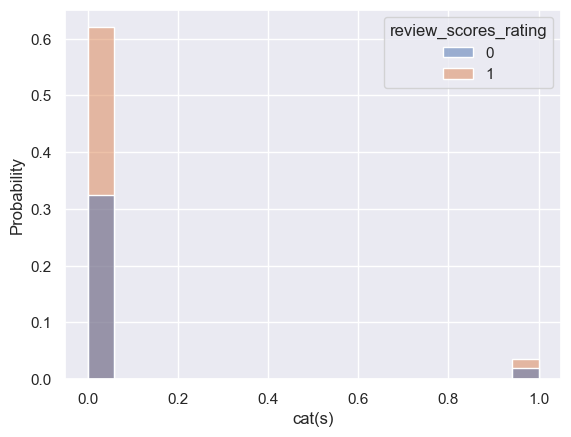

dog(s)


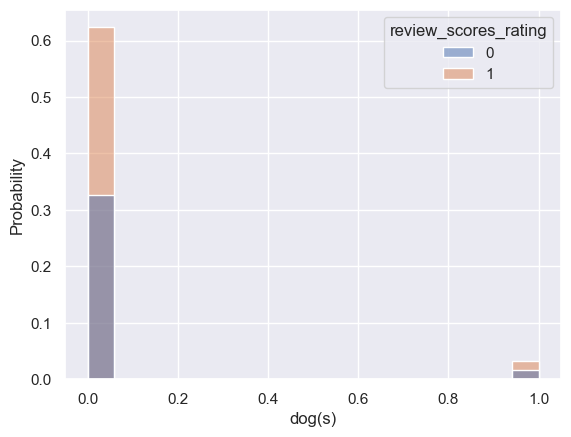

doorman


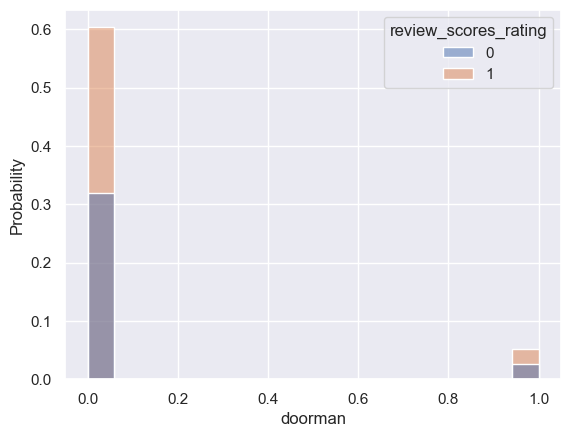

dryer


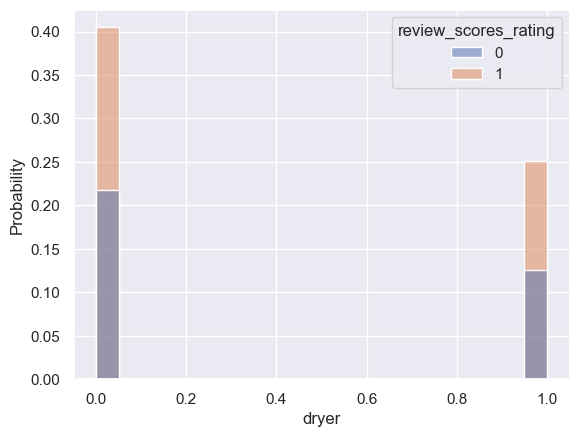

elevator_in_building


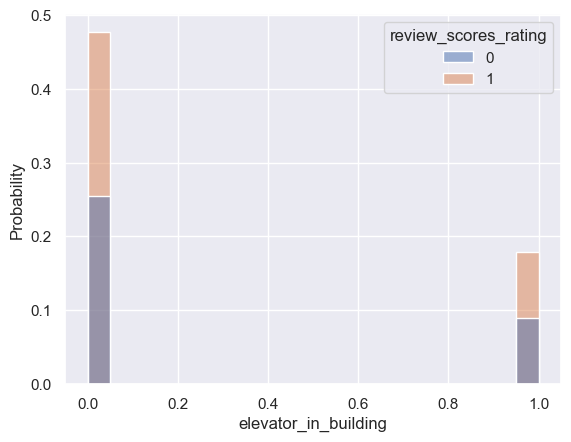

essentials


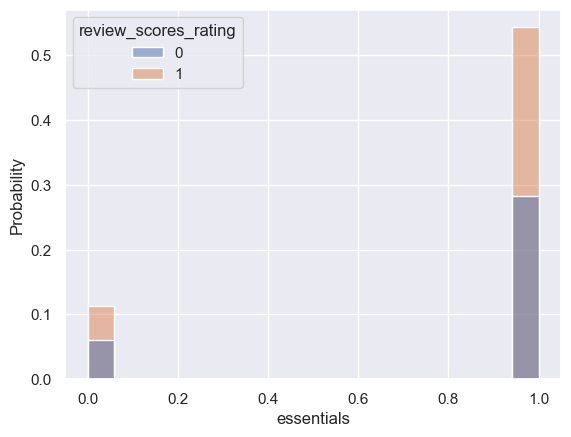

family_kid_friendly


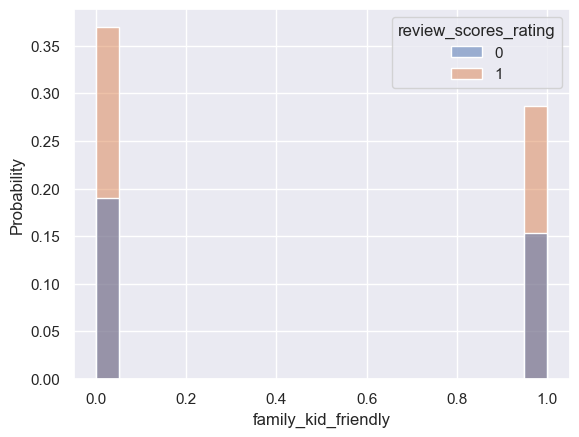

fire_extinguisher


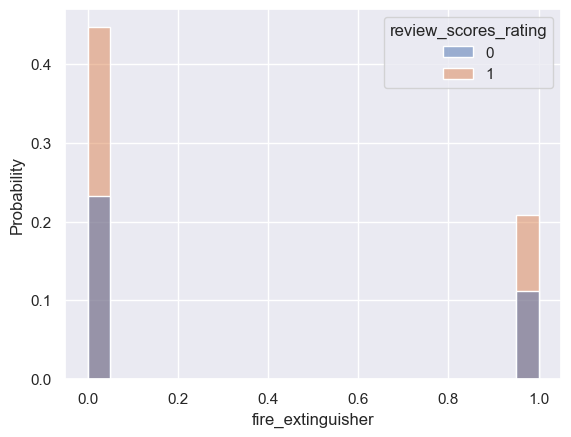

first_aid_kit


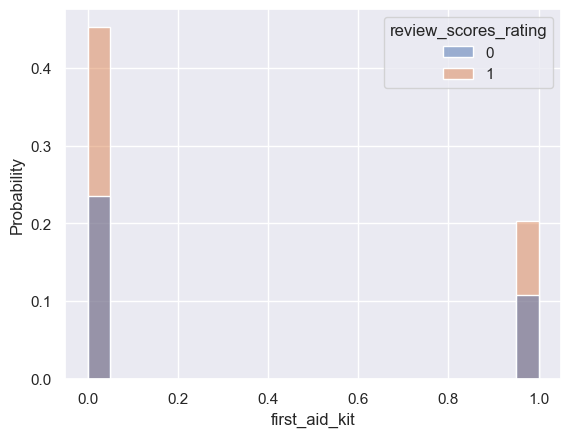

free_parking_on_premises


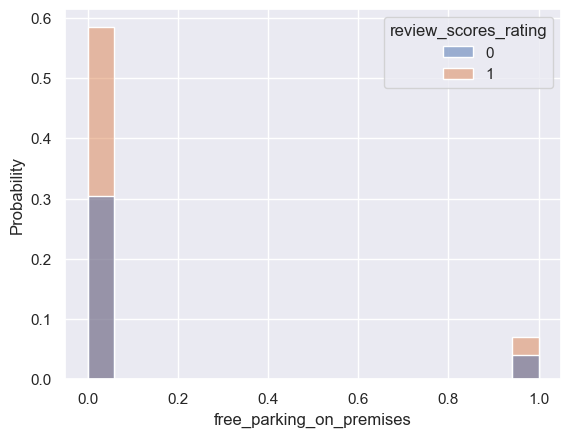

gym


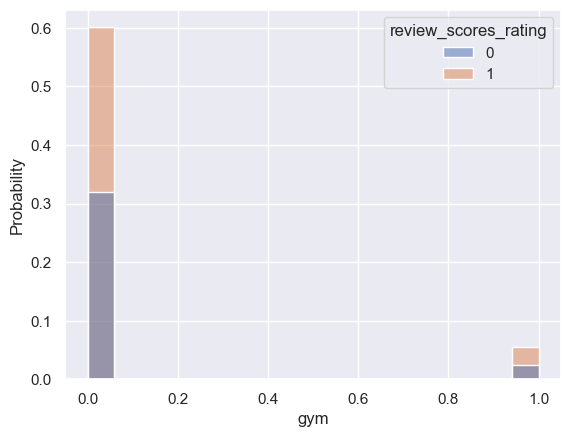

hair_dryer


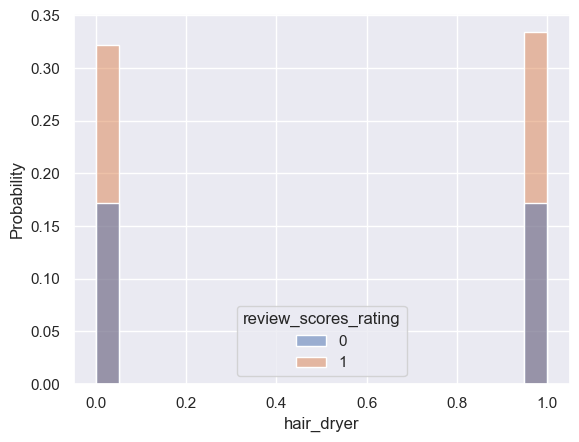

hangers


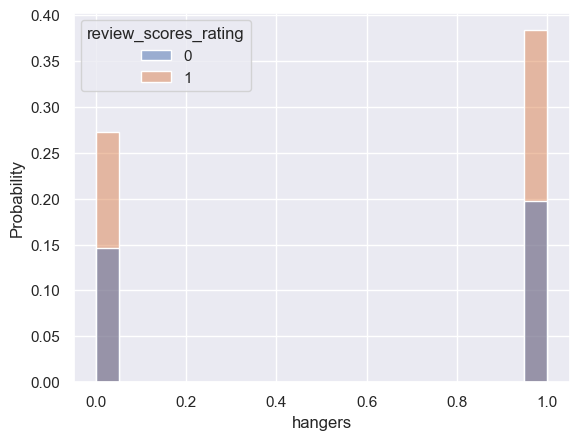

heating


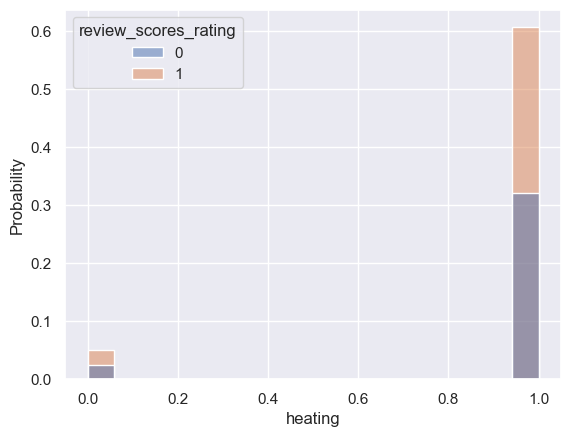

hot_tub


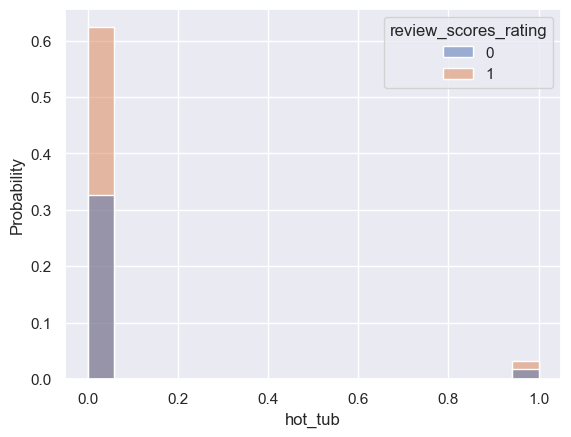

indoor_fireplace


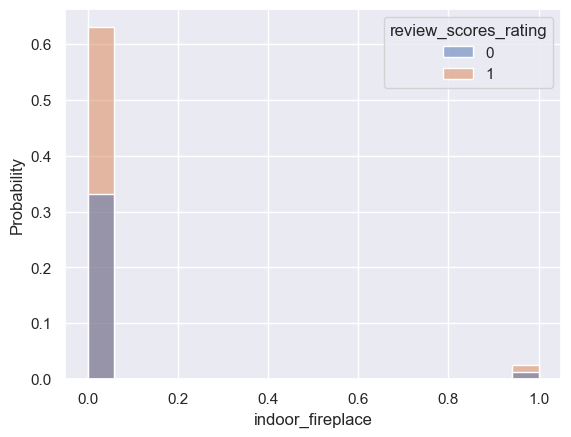

internet


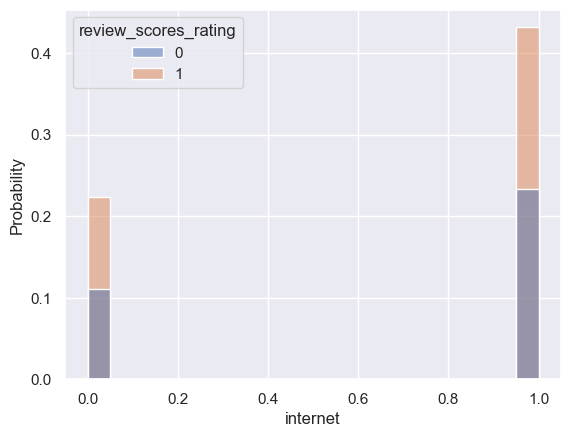

iron


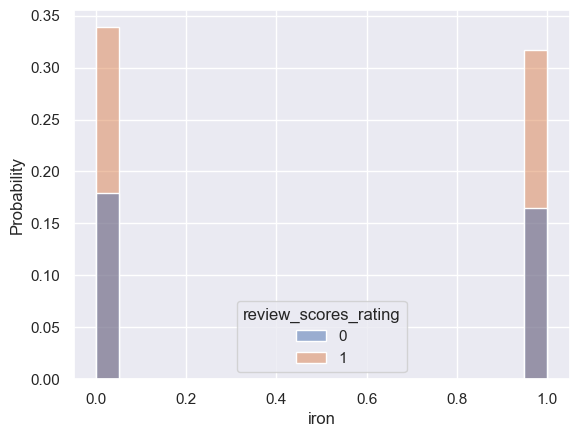

kitchen


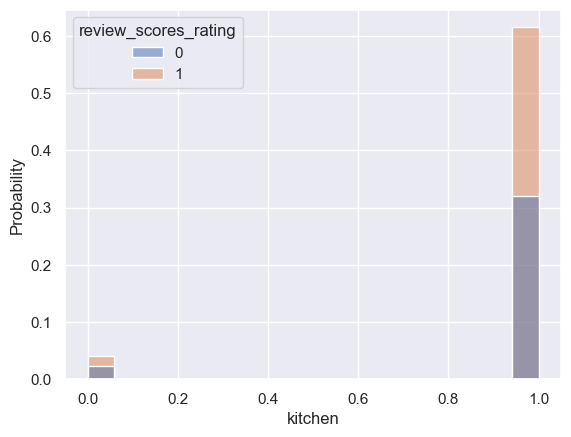

laptop_friendly_workspace


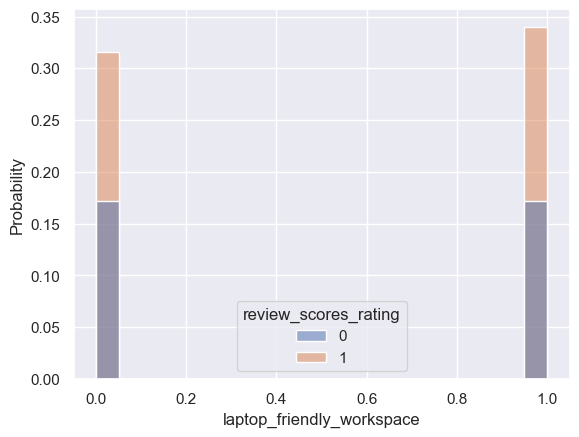

lock_on_bedroom_door


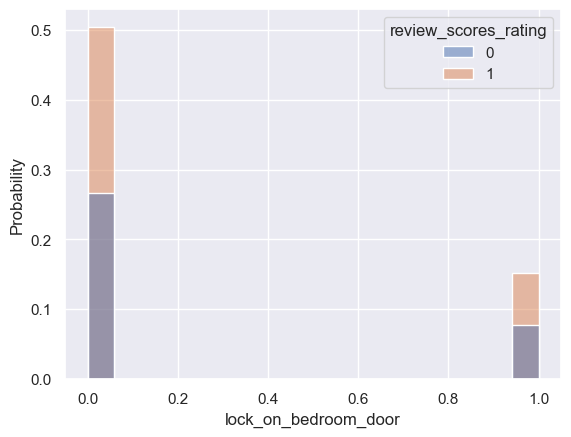

lockbox


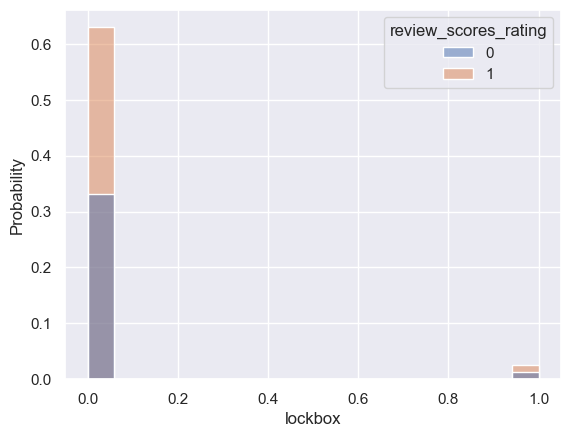

pets_allowed


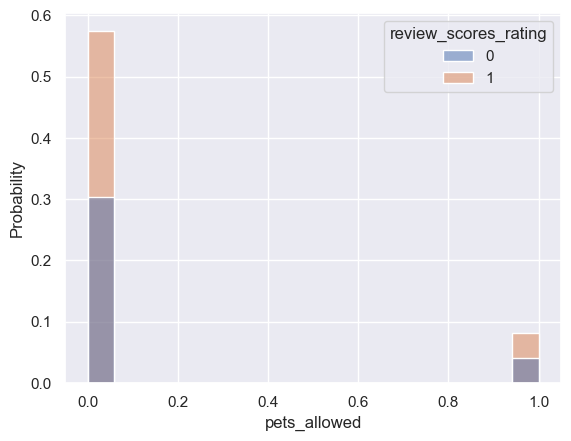

pets_live_on_this_property


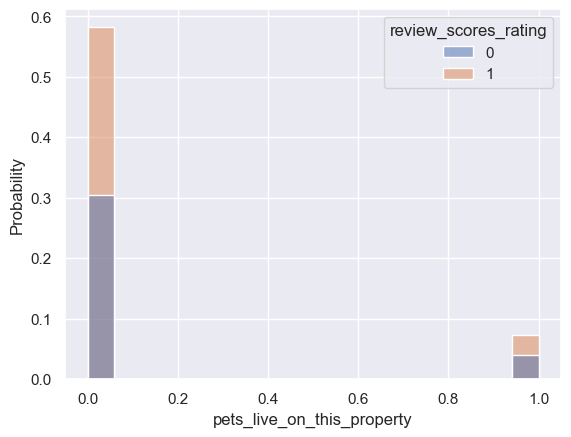

private_entrance


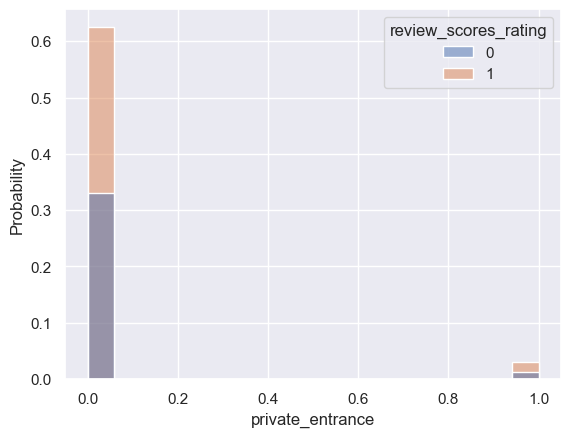

safety_card


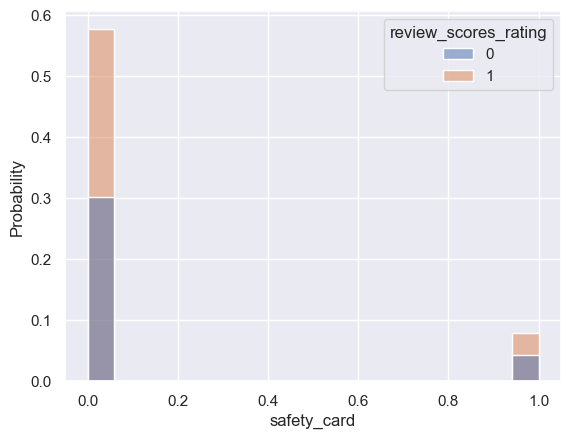

self_check_in


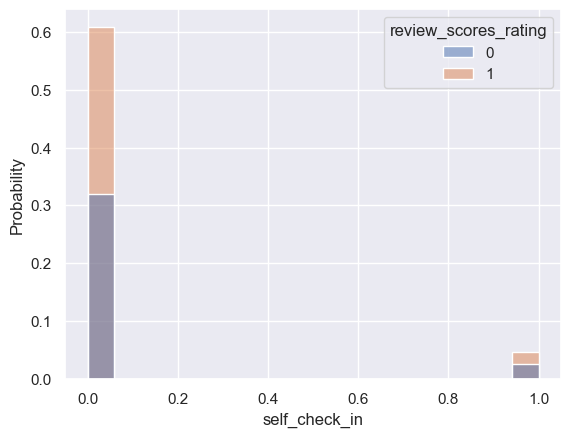

shampoo


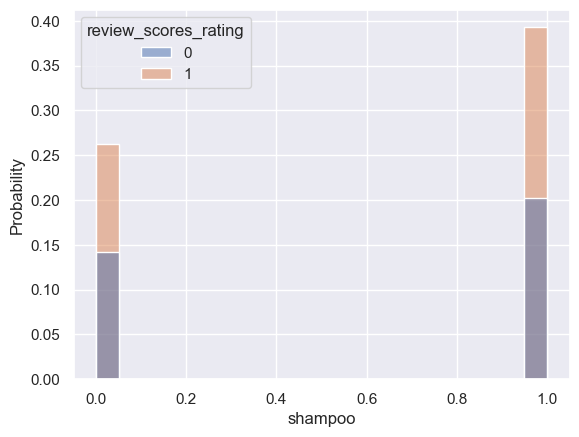

smoke_detector


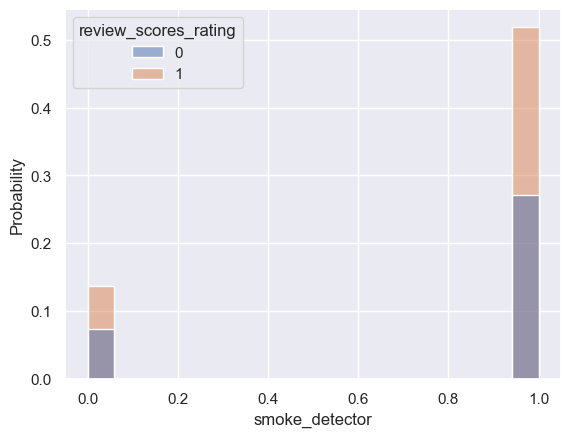

smoking_allowed


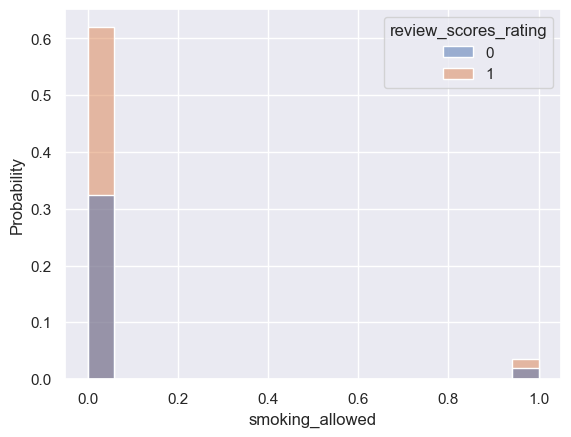

suitable_for_events


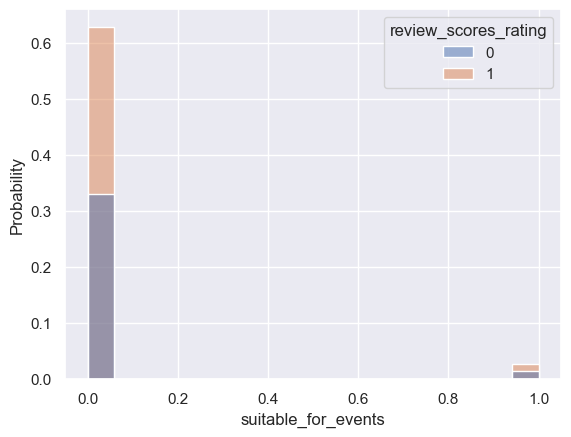

tv


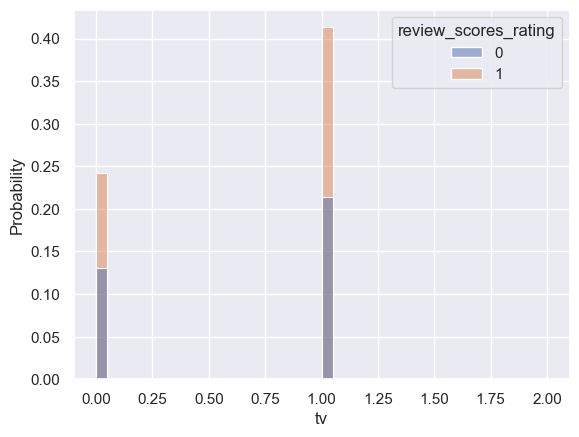

washer


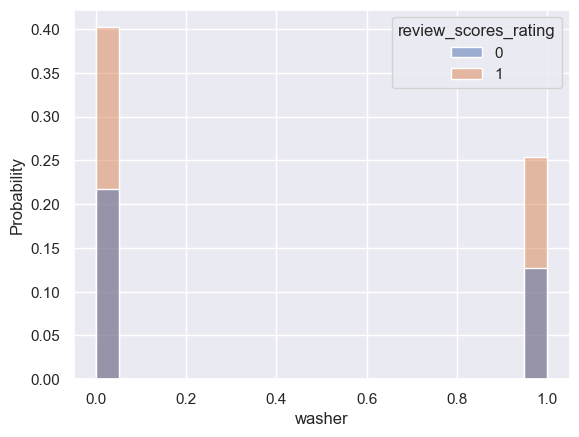

wheelchair_accessible


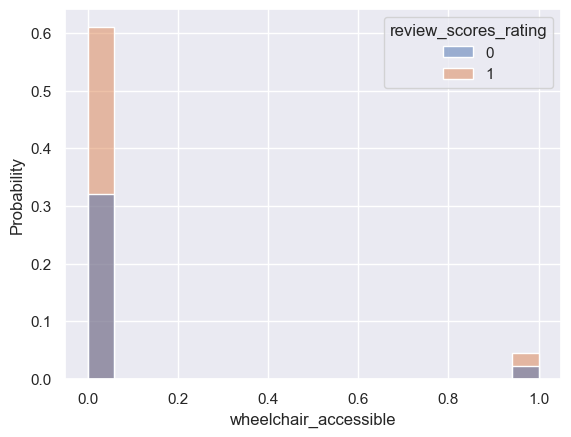

wireless_internet


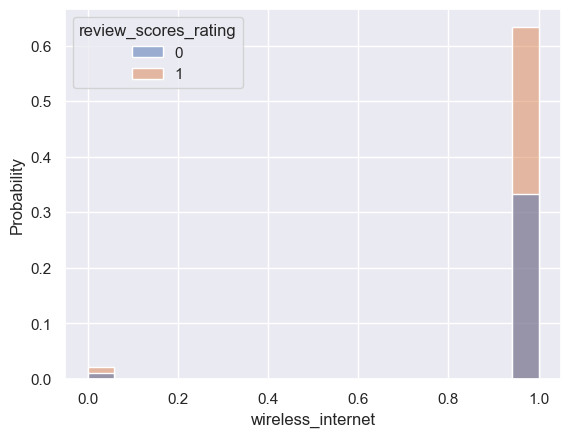

In [121]:
for amenity in freq_amenities:
    print(amenity)
    sns.histplot(x = NY_reale[amenity], hue = 'review_scores_rating', data = NY_reale,stat = 'probability')
    plt.show()

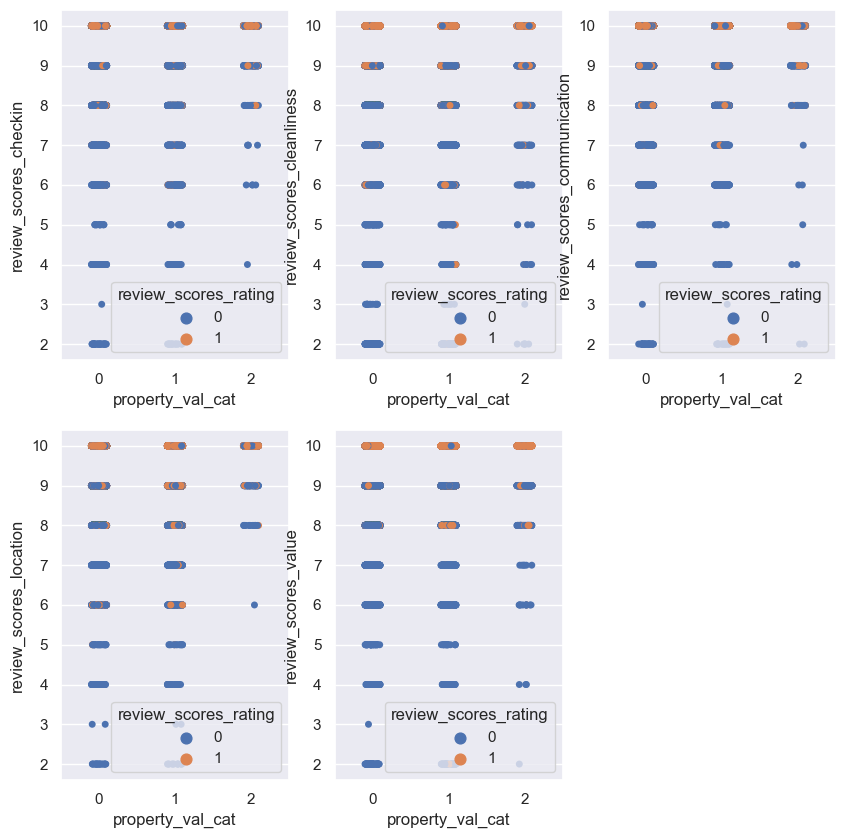

In [122]:
review_scores = ['review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value']
plt.figure(figsize = (10,10))
for i,review in enumerate(review_scores):
    plt.subplot(2,3,i+1)
    sns.stripplot(x='property_val_cat',y = review,hue = 'review_scores_rating',data = NY_reale)

In [123]:
property_review = pd.crosstab(NY_reale['property_val_cat'],NY_reale['review_scores_rating'])
g , p , dof , expctd = chi2_contingency(property_review)
print(p)

2.8978895548344445e-07


In [124]:
insig_amenities = list()
for amenity in sig_amenities:
    amenity_review = pd.crosstab(NY_reale[amenity],NY_reale['review_scores_rating'])
    g, p, dof, expctd = chi2_contingency(amenity_review)
    if p > 0.1:
        insig_amenities.append(amenity)


insig_amenities

['first_aid_kit',
 'smoking_allowed',
 'iron',
 'indoor_fireplace',
 'wheelchair_accessible',
 'pets_live_on_this_property',
 'smoke_detector',
 'wireless_internet',
 'buzzer_wireless_intercom',
 'self_check_in',
 'suitable_for_events']

In [125]:
ins_amenities = list()
for amenity in sig_amenities:
    a = NY_reale[NY_reale[amenity] == 0]['review_scores_rating']
    b = NY_reale[NY_reale[amenity] == 1]['review_scores_rating']
    T,p=ttest_ind(a,b)
    if p > 0.1:
        ins_amenities.append(amenity)
ins_amenities

['first_aid_kit',
 'smoking_allowed',
 'iron',
 'indoor_fireplace',
 'wheelchair_accessible',
 'pets_live_on_this_property',
 'smoke_detector',
 'wireless_internet',
 'buzzer_wireless_intercom',
 'self_check_in',
 'suitable_for_events']

In [126]:
NY_reale.property_val_cat = NY_reale.property_val_cat.astype('category')
NY_reale = pd.get_dummies(NY_reale)
NY_reale 

,bathrooms,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,mean_real_estate,twentyfour_hour_check_in,air_conditioning,...,smoke_detector,smoking_allowed,suitable_for_events,tv,washer,wheelchair_accessible,wireless_internet,property_val_cat_0,property_val_cat_1,property_val_cat_2
0,1.0,10.0,10.0,10.0,10.0,1,10.0,478419.760479,0,1,...,1,0,0,0,0,0,1,0,1,0
1,1.0,10.0,10.0,10.0,10.0,1,10.0,1763.238806,0,1,...,1,0,0,0,0,0,1,1,0,0
2,1.0,10.0,10.0,10.0,10.0,1,10.0,478419.760479,0,1,...,1,0,0,1,0,0,1,0,1,0
3,1.0,10.0,10.0,10.0,10.0,1,10.0,1763.238806,0,1,...,1,0,0,1,0,0,1,1,0,0
4,3.0,10.0,10.0,10.0,10.0,1,10.0,478419.760479,0,1,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60047,1.0,10.0,9.0,10.0,9.0,0,9.0,1690.895522,0,0,...,0,0,0,0,0,0,1,1,0,0
60048,1.0,10.0,10.0,10.0,10.0,1,10.0,389679.354839,0,1,...,1,0,0,1,0,0,1,1,0,0
60049,1.0,10.0,10.0,10.0,10.0,1,10.0,1690.895522,0,1,...,1,0,0,1,0,0,1,1,0,0
60050,2.0,10.0,10.0,10.0,10.0,1,10.0,339299.215686,0,1,...,1,0,0,1,0,0,1,1,0,0


### Splitting test-train dataset

In [127]:
# x_train, y_train for a neural network model
training = NY_reale.sample(frac=0.8,random_state=1337)
testing = NY_reale.drop(training.index)
x_train = training.drop(columns = ['review_scores_rating'])
y_train = training.review_scores_rating
x_test = testing.drop(columns = ['review_scores_rating'])
y_test = testing.review_scores_rating

In [128]:
x_train.columns

Index(['bathrooms', 'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'mean_real_estate', 'twentyfour_hour_check_in',
       'air_conditioning', 'breakfast', 'buzzer_wireless_intercom', 'cable_tv',
       'carbon_monoxide_detector', 'cat(s)', 'dog(s)', 'doorman', 'dryer',
       'elevator_in_building', 'essentials', 'family_kid_friendly',
       'fire_extinguisher', 'first_aid_kit', 'free_parking_on_premises', 'gym',
       'hair_dryer', 'hangers', 'heating', 'hot_tub', 'indoor_fireplace',
       'internet', 'iron', 'kitchen', 'laptop_friendly_workspace',
       'lock_on_bedroom_door', 'lockbox', 'pets_allowed',
       'pets_live_on_this_property', 'private_entrance', 'safety_card',
       'self_check_in', 'shampoo', 'smoke_detector', 'smoking_allowed',
       'suitable_for_events', 'tv', 'washer', 'wheelchair_accessible',
       'wireless_internet', 'property_val_cat_0', 'property_val_cat

## Model with interaction terms(interaction between reviews and property value)

In [129]:
subreview = ['review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value']
necessary_terms = list()
for review in subreview:
    necessary_terms.append(review)
    interaction_0 = 'property_val_cat_0:'+ review
    interaction_1 = 'property_val_cat_2:'+ review
    necessary_terms.append(interaction_0)
    necessary_terms.append(interaction_1)

necessary_terms.append('property_val_cat_0')
necessary_terms.append('property_val_cat_2')
necessary_terms

['review_scores_checkin',
 'property_val_cat_0:review_scores_checkin',
 'property_val_cat_2:review_scores_checkin',
 'review_scores_cleanliness',
 'property_val_cat_0:review_scores_cleanliness',
 'property_val_cat_2:review_scores_cleanliness',
 'review_scores_communication',
 'property_val_cat_0:review_scores_communication',
 'property_val_cat_2:review_scores_communication',
 'review_scores_location',
 'property_val_cat_0:review_scores_location',
 'property_val_cat_2:review_scores_location',
 'review_scores_value',
 'property_val_cat_0:review_scores_value',
 'property_val_cat_2:review_scores_value',
 'property_val_cat_0',
 'property_val_cat_2']

In [130]:
def logistic(n):
    terms = sig_amenities[0:n]
    for amenity in terms:
        necessary_terms.append(amenity)
    
    
    term = '+'.join(necessary_terms)
    
    formula = 'review_scores_rating~'+term
    logit = smf.logit(formula = formula,data = training).fit()

    return logit
logit = logistic(5)
logit.summary()

Optimization terminated successfully.
         Current function value: 0.325758
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     review_scores_rating   No. Observations:                47854
Model:                            Logit   Df Residuals:                    47831
Method:                             MLE   Df Model:                           22
Date:                  Mon, 10 Apr 2023   Pseudo R-squ.:                  0.4942
Time:                          14:33:41   Log-Likelihood:                -15589.
converged:                         True   LL-Null:                       -30823.
Covariance Type:              nonrobust   LLR p-value:                     0.000
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                        -49.9691      0.965    -51.808      0.000     -51.859     -48.079
review_scores_checkin                              0.5962      0.063      9.491      0.000       0.473       0.719
property_val_cat_0:review_scores_checkin           0.0661      0.078      0.845      0.398      -0.087       0.219
property_val_cat_2:review_scores_checkin           0.8658      0.310      2.791      0.005       0.258       1.474
review_scores_cleanliness                          1.3142      0.038     34.720      0.000       1.240       1.388
property_val_cat_0:review_scores_cleanliness      -0.0028      0.047     -0.061      0.951      -0.094       0.088
property_val_cat_2:review_scores_cleanliness       0.2554      0.164      1.554      0.120      -0.067       0.578
review_scores_communication                        0.9166      0.076     12.014      0.000       0.767       1.066
property_val_cat_0:review_scores_communication    -0.0077      0.094     -0.082      0.935      -0.192       0.177
property_val_cat_2:review_scores_communication    -0.1101      0.304     -0.362      0.717      -0.706       0.485
review_scores_location                             0.7122      0.038     18.544      0.000       0.637       0.787
property_val_cat_0:review_scores_location         -0.0239      0.048     -0.501      0.616      -0.117       0.069
property_val_cat_2:review_scores_location          0.5889      0.334      1.761      0.078      -0.067       1.244
review_scores_value                                1.7459      0.048     36.641      0.000       1.653       1.839
property_val_cat_0:review_scores_value             0.0893      0.059      1.521      0.128      -0.026       0.204
property_val_cat_2:review_scores_value            -0.1970      0.191     -1.034      0.301      -0.570       0.177
property_val_cat_0                                -1.2263      1.189     -1.031      0.302      -3.557       1.104
property_val_cat_2                               -14.1205      5.150     -2.742      0.006     -24.215      -4.026
gym                                                0.0753      0.055      1.363      0.173      -0.033       0.183
internet                                           0.0040      0.032      0.124      0.902      -0.059       0.067
twentyfour_hour_check_in                          -0.1239      0.037     -3.343      0.001      -0.197      -0.051
laptop_friendly_workspace                          0.0469      0.031      1.493      0.135      -0.015       0.108
private_entrance                                   0.1697      0.074      2.296      0.022       0.025       0.315
==================================================================================================================
"""

Text(0.5, 1.0, 'Model with interaction term(between property value and reviews)')

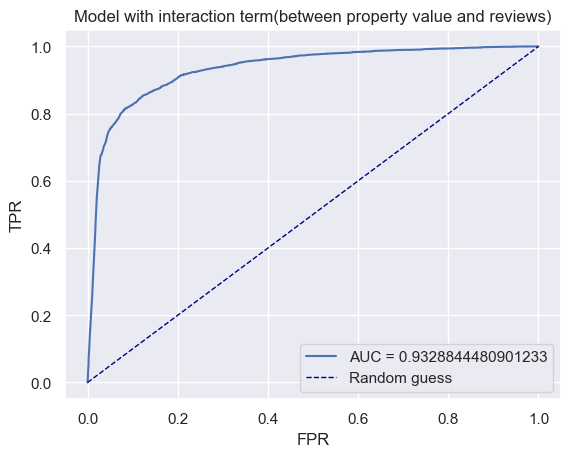

In [131]:
y_pred_proba = logit.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random guess')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.title('Model with interaction term(between property value and reviews)')


## Model with only review scores predictors

In [132]:
primary_terms = list()
for review in subreview:
    primary_terms.append(review)
def primary_logistic(n):
       
    
    
    term = '+'.join(primary_terms)
    
    formula = 'review_scores_rating~'+term
    logit = smf.logit(formula = formula,data = training).fit()

    return logit
primary_logistic(3).summary()

Optimization terminated successfully.
         Current function value: 0.326247
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     review_scores_rating   No. Observations:                47854
Model:                            Logit   Df Residuals:                    47848
Method:                             MLE   Df Model:                            5
Date:                  Mon, 10 Apr 2023   Pseudo R-squ.:                  0.4935
Time:                          14:33:41   Log-Likelihood:                -15612.
converged:                         True   LL-Null:                       -30823.
Covariance Type:              nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -50.9719      0.559    -91.141      0.000     -52.068     -49.876
review_scores_checkin           0.6568      0.037     17.699      0.000       0.584       0.730
review_scores_cleanliness       1.3179      0.022     60.324      0.000       1.275       1.361
review_scores_communication     0.9118      0.044     20.595      0.000       0.825       0.999
review_scores_location          0.6928      0.023     30.726      0.000       0.649       0.737
review_scores_value             1.8058      0.028     65.600      0.000       1.752       1.860
===============================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.326247
         Iterations 8


Text(0.5, 1.0, 'Model with only review scores predictors')

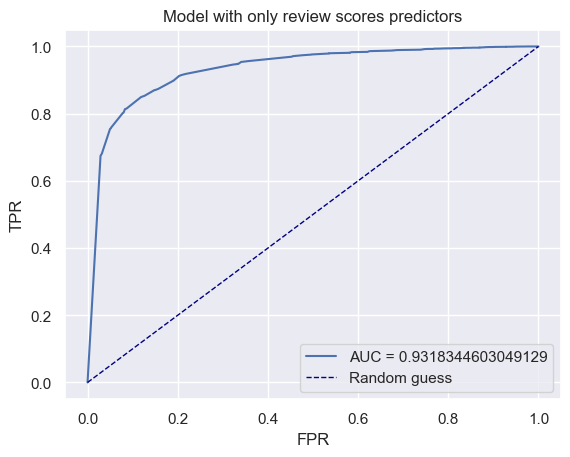

In [133]:
y_pred_proba = primary_logistic(3).predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random guess')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.title('Model with only review scores predictors')

## Model with only review predictors without interaction terms

In [134]:
def logistic_amen(n):
    amen_predictors = list()
    terms = sig_amenities[0:n]
    for amenity in terms:
        amen_predictors.append(amenity)
    
    
    term = '+'.join(amen_predictors)
    
    formula = 'review_scores_rating~'+term
    
    return formula
formula = logistic_amen(31)
formula

'review_scores_rating~gym+internet+twentyfour_hour_check_in+laptop_friendly_workspace+private_entrance+washer+kitchen+elevator_in_building+breakfast+heating+free_parking_on_premises+tv+hangers+shampoo+family_kid_friendly+doorman+pets_allowed+hot_tub+hair_dryer+carbon_monoxide_detector+fire_extinguisher+essentials+cable_tv+safety_card+air_conditioning+lock_on_bedroom_door+first_aid_kit+smoking_allowed+iron+indoor_fireplace+wheelchair_accessible'

In [135]:
logit = smf.logit(formula = formula,data = training).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.642067
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     review_scores_rating   No. Observations:                47854
Model:                            Logit   Df Residuals:                    47822
Method:                             MLE   Df Model:                           31
Date:                  Mon, 10 Apr 2023   Pseudo R-squ.:                0.003157
Time:                          14:33:41   Log-Likelihood:                -30725.
converged:                         True   LL-Null:                       -30823.
Covariance Type:              nonrobust   LLR p-value:                 1.310e-25
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6531      0.049     13.306      0.000       0.557       0.749
gym                           0.1188      0.042      2.827      0.005       0.036       0.201
internet                     -0.0668      0.023     -2.922      0.003      -0.112      -0.022
twentyfour_hour_check_in     -0.1115      0.026     -4.290      0.000      -0.162      -0.061
laptop_friendly_workspace     0.0931      0.024      3.807      0.000       0.045       0.141
private_entrance              0.2265      0.050      4.525      0.000       0.128       0.325
washer                        0.0681      0.022      3.061      0.002       0.024       0.112
kitchen                       0.1305      0.041      3.208      0.001       0.051       0.210
elevator_in_building         -0.0078      0.027     -0.286      0.775      -0.061       0.046
breakfast                     0.0883      0.037      2.357      0.018       0.015       0.162
heating                      -0.1494      0.041     -3.658      0.000      -0.229      -0.069
free_parking_on_premises     -0.0784      0.031     -2.513      0.012      -0.140      -0.017
tv                            0.0728      0.022      3.266      0.001       0.029       0.117
hangers                       0.0103      0.027      0.382      0.702      -0.042       0.063
shampoo                       0.0461      0.023      2.021      0.043       0.001       0.091
family_kid_friendly          -0.0530      0.021     -2.569      0.010      -0.093      -0.013
doorman                       0.0702      0.044      1.597      0.110      -0.016       0.156
pets_allowed                  0.0928      0.031      3.009      0.003       0.032       0.153
hot_tub                      -0.1033      0.045     -2.319      0.020      -0.191      -0.016
hair_dryer                    0.0020      0.027      0.073      0.942      -0.051       0.055
carbon_monoxide_detector     -0.0361      0.022     -1.628      0.104      -0.080       0.007
fire_extinguisher            -0.0255      0.024     -1.070      0.285      -0.072       0.021
essentials                    0.0113      0.028      0.399      0.690      -0.044       0.067
cable_tv                     -0.0449      0.025     -1.824      0.068      -0.093       0.003
safety_card                  -0.0436      0.033     -1.323      0.186      -0.108       0.021
air_conditioning             -0.0490      0.027     -1.812      0.070      -0.102       0.004
lock_on_bedroom_door         -0.0194      0.025     -0.790      0.429      -0.068       0.029
first_aid_kit                -0.0009      0.025     -0.037      0.970      -0.049       0.047
smoking_allowed              -0.0814      0.043     -1.911      0.056      -0.165       0.002
iron                          0.0111      0.027      0.415      0.678      -0.041       0.064
indoor_fireplace              0.0778      0.052      1.496      0.135      -0.024       0.180
wheelchair_accessible      

Text(0.5, 1.0, 'Model with only amenities predictors')

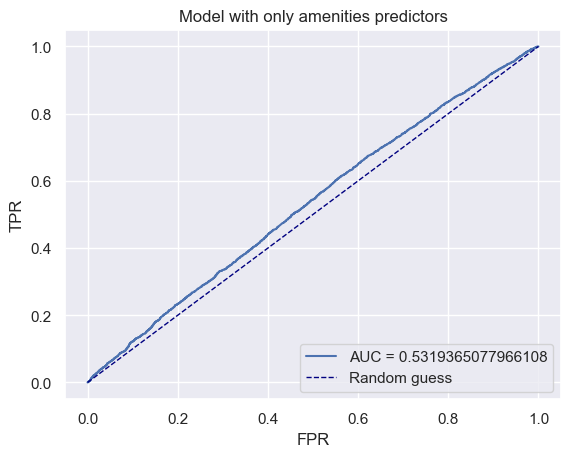

In [136]:
y_pred_proba = logit.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random guess')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend(loc=4)
plt.title('Model with only amenities predictors')

In [137]:
highest_AUC = 0
for i in range(1,42):
    formula = logistic_amen(i)
    logit = smf.logit(formula = formula,data = training).fit()
    y_pred_proba = logit.predict(x_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    if highest_AUC < auc:
        highest_AUC = auc
        pred_num = i

print(highest_AUC,pred_num)
    

Optimization terminated successfully.
         Current function value: 0.643921
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643713
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643617
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643288
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643116
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642997
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642922
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642919
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642709
  

## Models with amenities and interaction terms

In [138]:
def logistic_amen_inter(n):
    amen_predictors = list()
    terms = sig_amenities[0:n]
    for amenity in terms:
        amen_predictors.append(amenity)
        interaction_0 = 'property_val_cat_0:'+ amenity
        interaction_1 = 'property_val_cat_2:'+ amenity
        amen_predictors.append(interaction_0)
        amen_predictors.append(interaction_1)

    amen_predictors.append('property_val_cat_0')
    amen_predictors.append('property_val_cat_2')
    
    
    amen_term = '+'.join(amen_predictors)
    
    formula = 'review_scores_rating~'+amen_term
    
    return formula
formula = logistic_amen_inter(4)
formula

'review_scores_rating~gym+property_val_cat_0:gym+property_val_cat_2:gym+internet+property_val_cat_0:internet+property_val_cat_2:internet+twentyfour_hour_check_in+property_val_cat_0:twentyfour_hour_check_in+property_val_cat_2:twentyfour_hour_check_in+laptop_friendly_workspace+property_val_cat_0:laptop_friendly_workspace+property_val_cat_2:laptop_friendly_workspace+property_val_cat_0+property_val_cat_2'

In [139]:
logit_amen_inter = smf.logit(formula = formula,data = training).fit()

logit_amen_inter.summary()

Optimization terminated successfully.
         Current function value: 0.642920
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     review_scores_rating   No. Observations:                47854
Model:                            Logit   Df Residuals:                    47839
Method:                             MLE   Df Model:                           14
Date:                  Mon, 10 Apr 2023   Pseudo R-squ.:                0.001833
Time:                          14:33:47   Log-Likelihood:                -30766.
converged:                         True   LL-Null:                       -30823.
Covariance Type:              nonrobust   LLR p-value:                 1.465e-17
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.7276      0.034     21.686      0.000       0.662       0.793
gym                                              0.1478      0.062      2.386      0.017       0.026       0.269
property_val_cat_0:gym                          -0.0042      0.077     -0.054      0.957      -0.156       0.147
property_val_cat_2:gym                           0.7045      0.371      1.897      0.058      -0.023       1.432
internet                                        -0.1389      0.037     -3.748      0.000      -0.212      -0.066
property_val_cat_0:internet                      0.0902      0.045      1.991      0.047       0.001       0.179
property_val_cat_2:internet                      0.1844      0.148      1.245      0.213      -0.106       0.475
twentyfour_hour_check_in                        -0.0759      0.043     -1.753      0.080      -0.161       0.009
property_val_cat_0:twentyfour_hour_check_in     -0.0487      0.053     -0.917      0.359      -0.153       0.055
property_val_cat_2:twentyfour_hour_check_in     -0.3426      0.165     -2.074      0.038      -0.666      -0.019
laptop_friendly_workspace                        0.1319      0.036      3.669      0.000       0.061       0.202
property_val_cat_0:laptop_friendly_workspace    -0.0345      0.044     -0.782      0.434      -0.121       0.052
property_val_cat_2:laptop_friendly_workspace     0.1864      0.143      1.302      0.193      -0.094       0.467
property_val_cat_0                              -0.1040      0.041     -2.540      0.011      -0.184      -0.024
property_val_cat_2                              -0.3935      0.131     -3.003      0.003      -0.650      -0.137
================================================================================================================
"""

In [140]:
highest_AUC = 0
for i in range(1,42):
    formula = logistic_amen_inter(i)
    logit = smf.logit(formula = formula,data = training).fit()
    y_pred_proba = logit.predict(x_test)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    if highest_AUC < auc:
        highest_AUC = auc
        pred_num = i

print(highest_AUC,pred_num)

Optimization terminated successfully.
         Current function value: 0.643649
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643405
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.643269
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642920
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642730
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642584
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642487
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642446
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642392
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642214
  

## Cross validation

In [141]:
X,y = NY_reale.drop(columns = ['review_scores_rating']), NY_reale.review_scores_rating 

skf = StratifiedKFold(n_splits = 5)
def compute_AUC(X,y,train_index,test_index,n):
    tprs  = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    X_train,y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index],y.iloc[test_index]
    
    clf = logistic(n)
    default_proba_test = clf.predict(X_test)
    auc_score = metrics.roc_auc_score(y_test, default_proba_test)
    return auc_score
 


In [142]:
def cross_validation_AUC(X,y,n,nfold = 10):
    
    skf = StratifiedKFold(n_splits = nfold)
    auc_list = []
     
    for k, (train_index,test_index) in enumerate(skf.split(X,y)):
        auc_score= compute_AUC(X,y,train_index,test_index,n)
        auc_list.append(auc_score)
    return auc_list

In [143]:
auc = cross_validation_AUC(X,y,30,nfold=10)

mean_auc_vs = np.mean(auc)
std_auc_vs = np.std(auc)
print(mean_auc_vs, std_auc_vs)

Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.325210
  

# Random Forest

In [144]:
xr_test = testing[['wireless_internet','gym',
 'internet',
 'twentyfour_hour_check_in',
 'laptop_friendly_workspace',
 'private_entrance',
 'washer',
 'kitchen',
 'elevator_in_building',
 'breakfast',
 'heating',
 'free_parking_on_premises',
 'tv',
 'hangers',
 'shampoo',
 'family_kid_friendly',
 'doorman',
 'pets_allowed',
 'hot_tub',
 'hair_dryer',
 'carbon_monoxide_detector',
 'fire_extinguisher',
 'essentials',
 'cable_tv',
 'safety_card',
 'air_conditioning',
 'lock_on_bedroom_door',
 'first_aid_kit',
 'smoking_allowed',
 'iron',
 'indoor_fireplace',
 'wheelchair_accessible',
 'pets_live_on_this_property',
 'smoke_detector',
 'wireless_internet',
 'buzzer_wireless_intercom',
 'self_check_in',
 'bathrooms',
 'suitable_for_events','property_val_cat_0','property_val_cat_1','property_val_cat_2']]
yr_test = testing.review_scores_rating

In [145]:
xr_train = training[['wireless_internet','gym',
 'internet',
 'twentyfour_hour_check_in',
 'laptop_friendly_workspace',
 'private_entrance',
 'washer',
 'kitchen',
 'elevator_in_building',
 'breakfast',
 'heating',
 'free_parking_on_premises',
 'tv',
 'hangers',
 'shampoo',
 'family_kid_friendly',
 'doorman',
 'pets_allowed',
 'hot_tub',
 'hair_dryer',
 'carbon_monoxide_detector',
 'fire_extinguisher',
 'essentials',
 'cable_tv',
 'safety_card',
 'air_conditioning',
 'lock_on_bedroom_door',
 'first_aid_kit',
 'smoking_allowed',
 'iron',
 'indoor_fireplace',
 'wheelchair_accessible',
 'pets_live_on_this_property',
 'smoke_detector',
 'wireless_internet',
 'buzzer_wireless_intercom',
 'self_check_in',
 'bathrooms',
 'suitable_for_events','property_val_cat_0','property_val_cat_1','property_val_cat_2']]
yr_train = training.review_scores_rating

In [146]:
model = RandomForestClassifier(
    max_depth=100, n_estimators=80,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=1337)
 
model.fit(xr_train, yr_train)

RandomForestClassifier(max_depth=100, max_leaf_nodes=5, min_samples_split=3,
                       n_estimators=80, random_state=1337)

In [147]:
#checking accuracy and overfitting. Model is not overfitting
print('Training Accuracy : ',
      metrics.accuracy_score(
          yr_train, model.predict(xr_train))*100)
 
print(' Testing Accuracy : ', metrics.accuracy_score(
    yr_test, model.predict(xr_test))*100)

Training Accuracy :  65.57863501483679
 Testing Accuracy :  65.78617403661289


In [148]:
yr_test_pred = model.predict_proba(xr_test)[:,1]

Text(0.5, 1.0, 'RandomForest model')

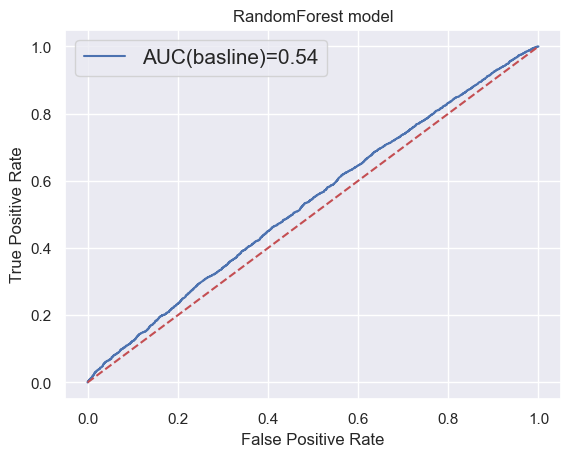

In [149]:
from sklearn.metrics import auc
fpr, tpr, _ = roc_curve(yr_test, yr_test_pred) 
auc_baseline = auc(fpr, tpr) 
plt.plot(fpr, tpr, "b-", label="AUC(basline)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title('RandomForest model')

# Neural network

In [150]:
x_train = training.drop(columns = ['review_scores_rating','bathrooms','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value','mean_real_estate'])
y_train = training.review_scores_rating
x_test = testing.drop(columns = ['review_scores_rating','bathrooms','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value','mean_real_estate'])
y_test = testing.review_scores_rating

In [151]:
sc = StandardScaler()

scaler = sc.fit(x_train)
trainX_scaled = scaler.transform(x_train)
testX_scaled = scaler.transform(x_test)

In [152]:
mlp_clf = MLPClassifier(hidden_layer_sizes = (150,100,50),
                      max_iter = 300, activation = 'relu',
                      solver = 'adam')
mlp_clf.fit(trainX_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [153]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.74


/Users/jeongmookwag/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


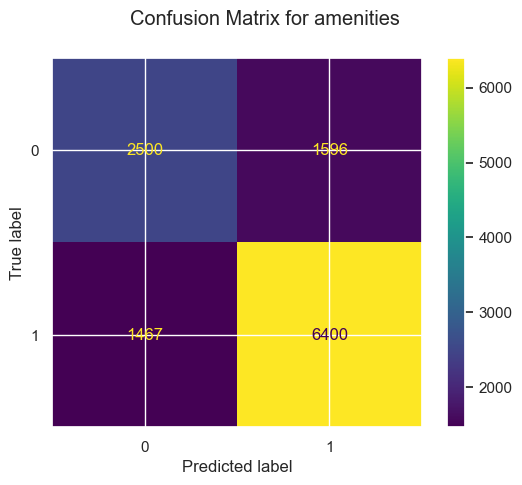

In [154]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for amenities")
plt.show()

In [155]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.61      0.62      4096
           1       0.80      0.81      0.81      7867

    accuracy                           0.74     11963
   macro avg       0.72      0.71      0.71     11963
weighted avg       0.74      0.74      0.74     11963



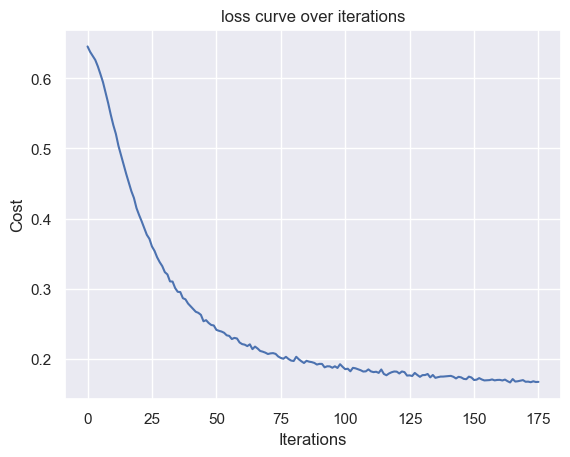

In [156]:
sns.lineplot(data = mlp_clf.loss_curve_).set(title = 'loss curve over iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()